In [67]:
#!pip install plotly==4.5.4
#!pip install chart-studio

In [68]:
#Useful Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
pd.set_option('display.max_columns', 500)
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [69]:
#Loading the raw data
data=pd.read_csv('results.csv')
#data['date'] = pd.to_datetime(data['date'])
#data['year'] = data['date'].apply(lambda time: time.year)
data.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
4064,1956-12-01,Uganda,Kenya,3,2,Friendly,Kampala,Uganda,False
10048,1977-03-08,Malaysia,Hong Kong,1,1,FIFA World Cup qualification,Kallang,Singapore,True
17950,1993-08-25,Denmark,Lithuania,4,0,FIFA World Cup qualification,Copenhagen,Denmark,False
22222,1999-08-18,Norway,Lithuania,1,0,Friendly,Oslo,Norway,False
11825,1981-06-22,Malta,Thailand,2,0,Korea Cup,Seoul,South Korea,True


# Exploratory Analysis

### DataTypes and general informations about the dataset

In [70]:
data.shape

(41586, 9)

In [71]:
pd.DataFrame(data.dtypes).T

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,object,object,object,int64,int64,object,object,object,bool


____
## Number of matches
### Distribution of number of matches  through decades

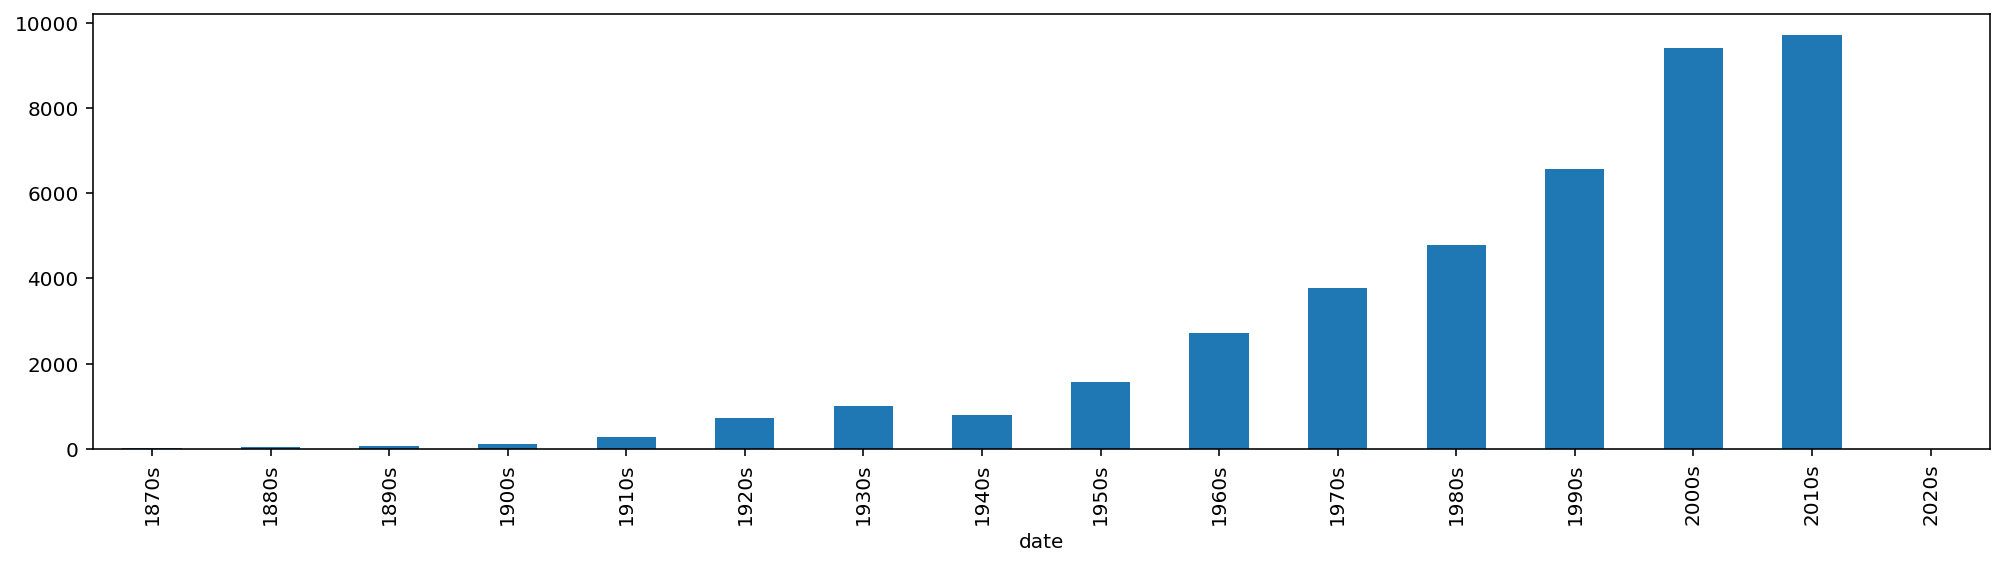

In [72]:
decades=data['date'].str.slice(0,3)
decades=decades.astype(str)+'0s'
decades=decades.groupby(decades).count()
pd.DataFrame(decades).plot.bar(y=0,legend=False, figsize=(17,4))
plt.show()  

We notice that the amount of international matches per year increased exponentially over time until 2000s.

### Distribution of matches per team (full distribution, top and low 50)

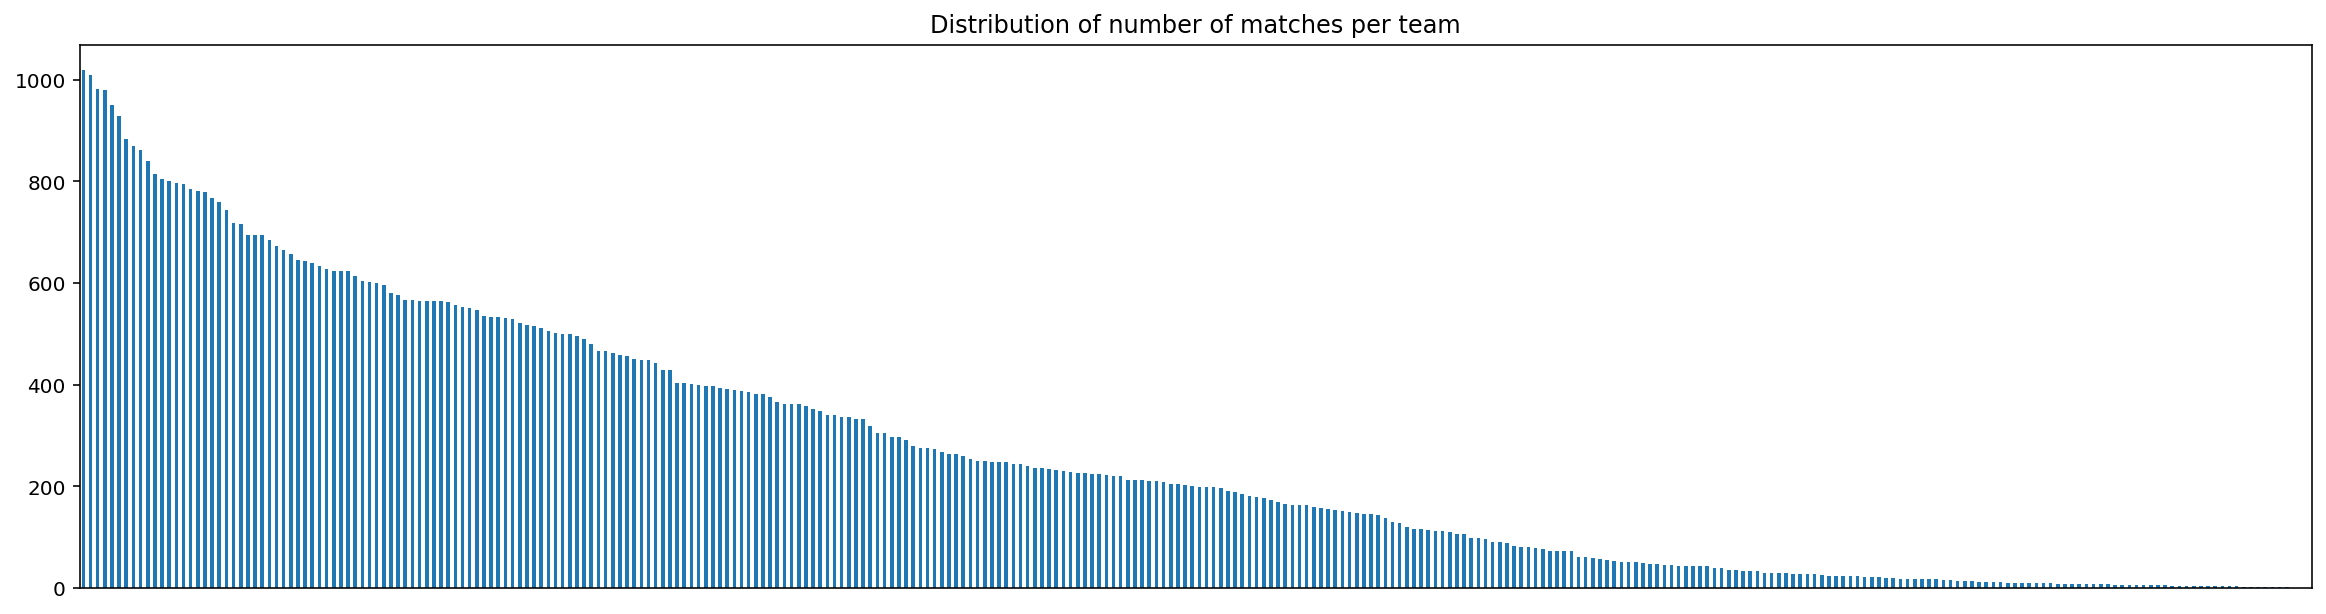

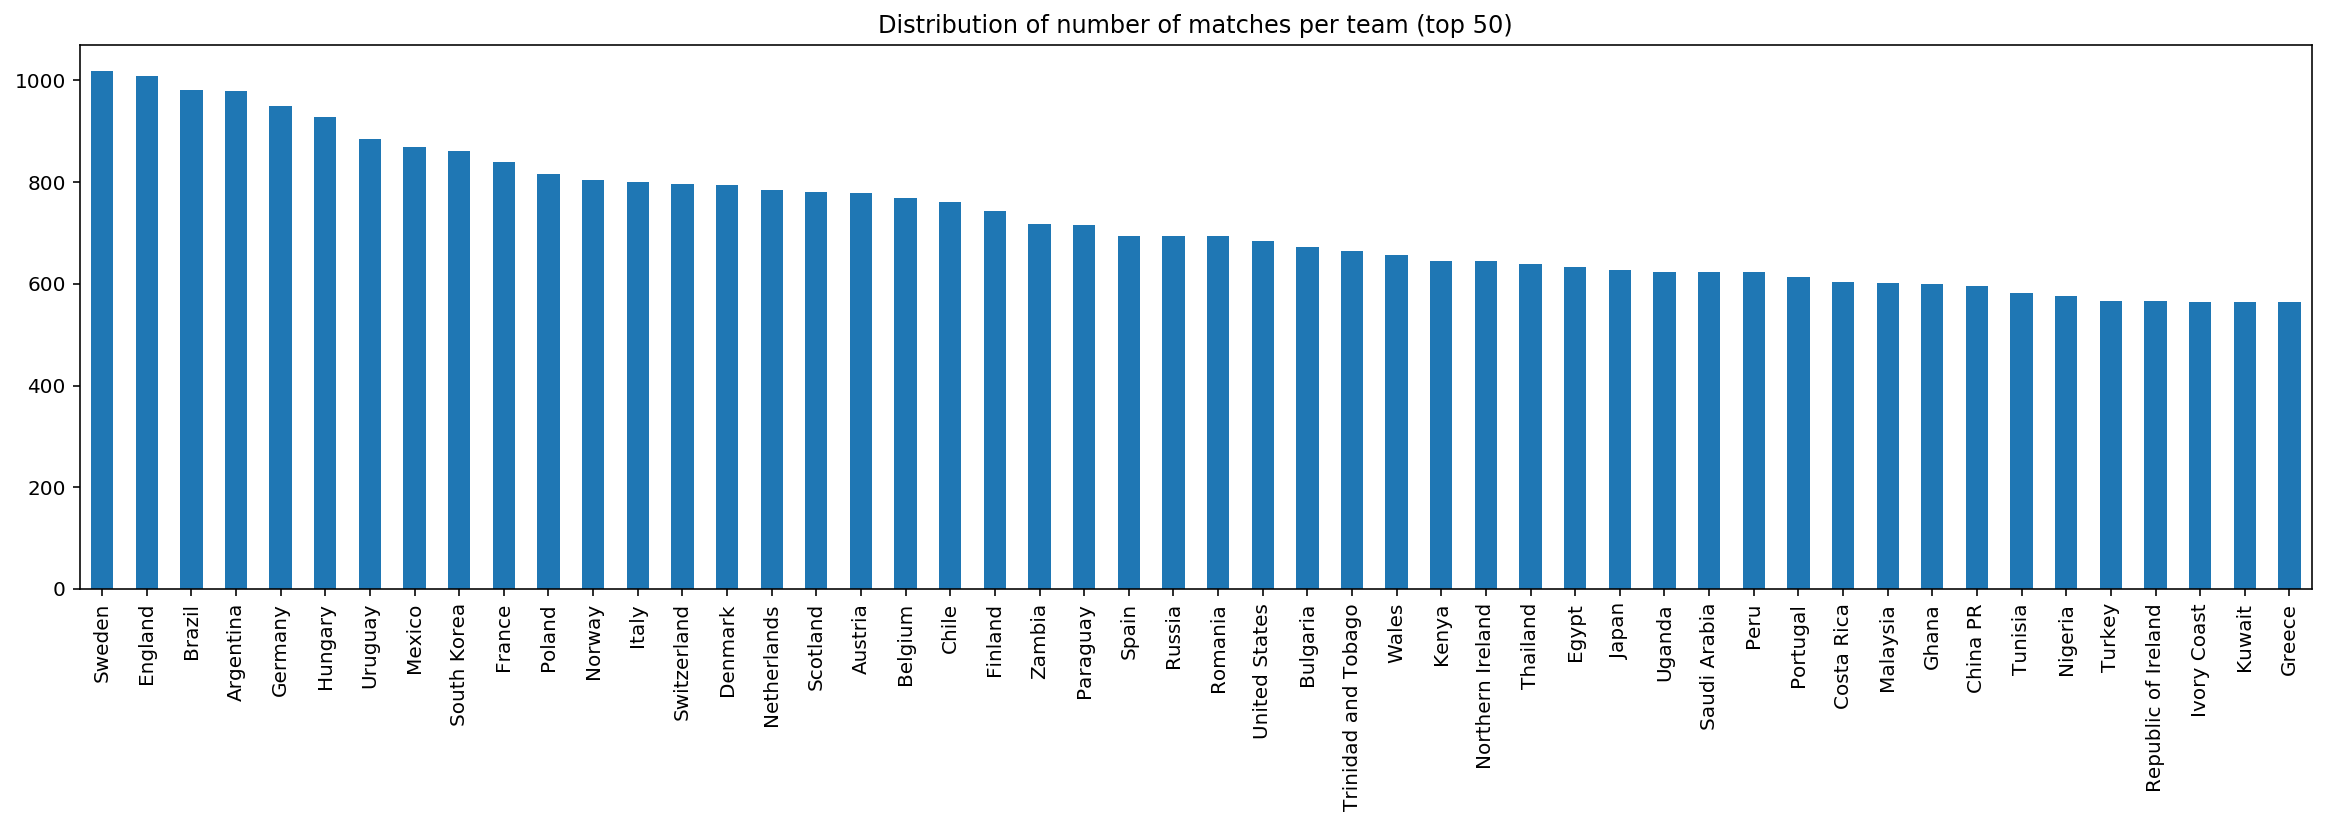

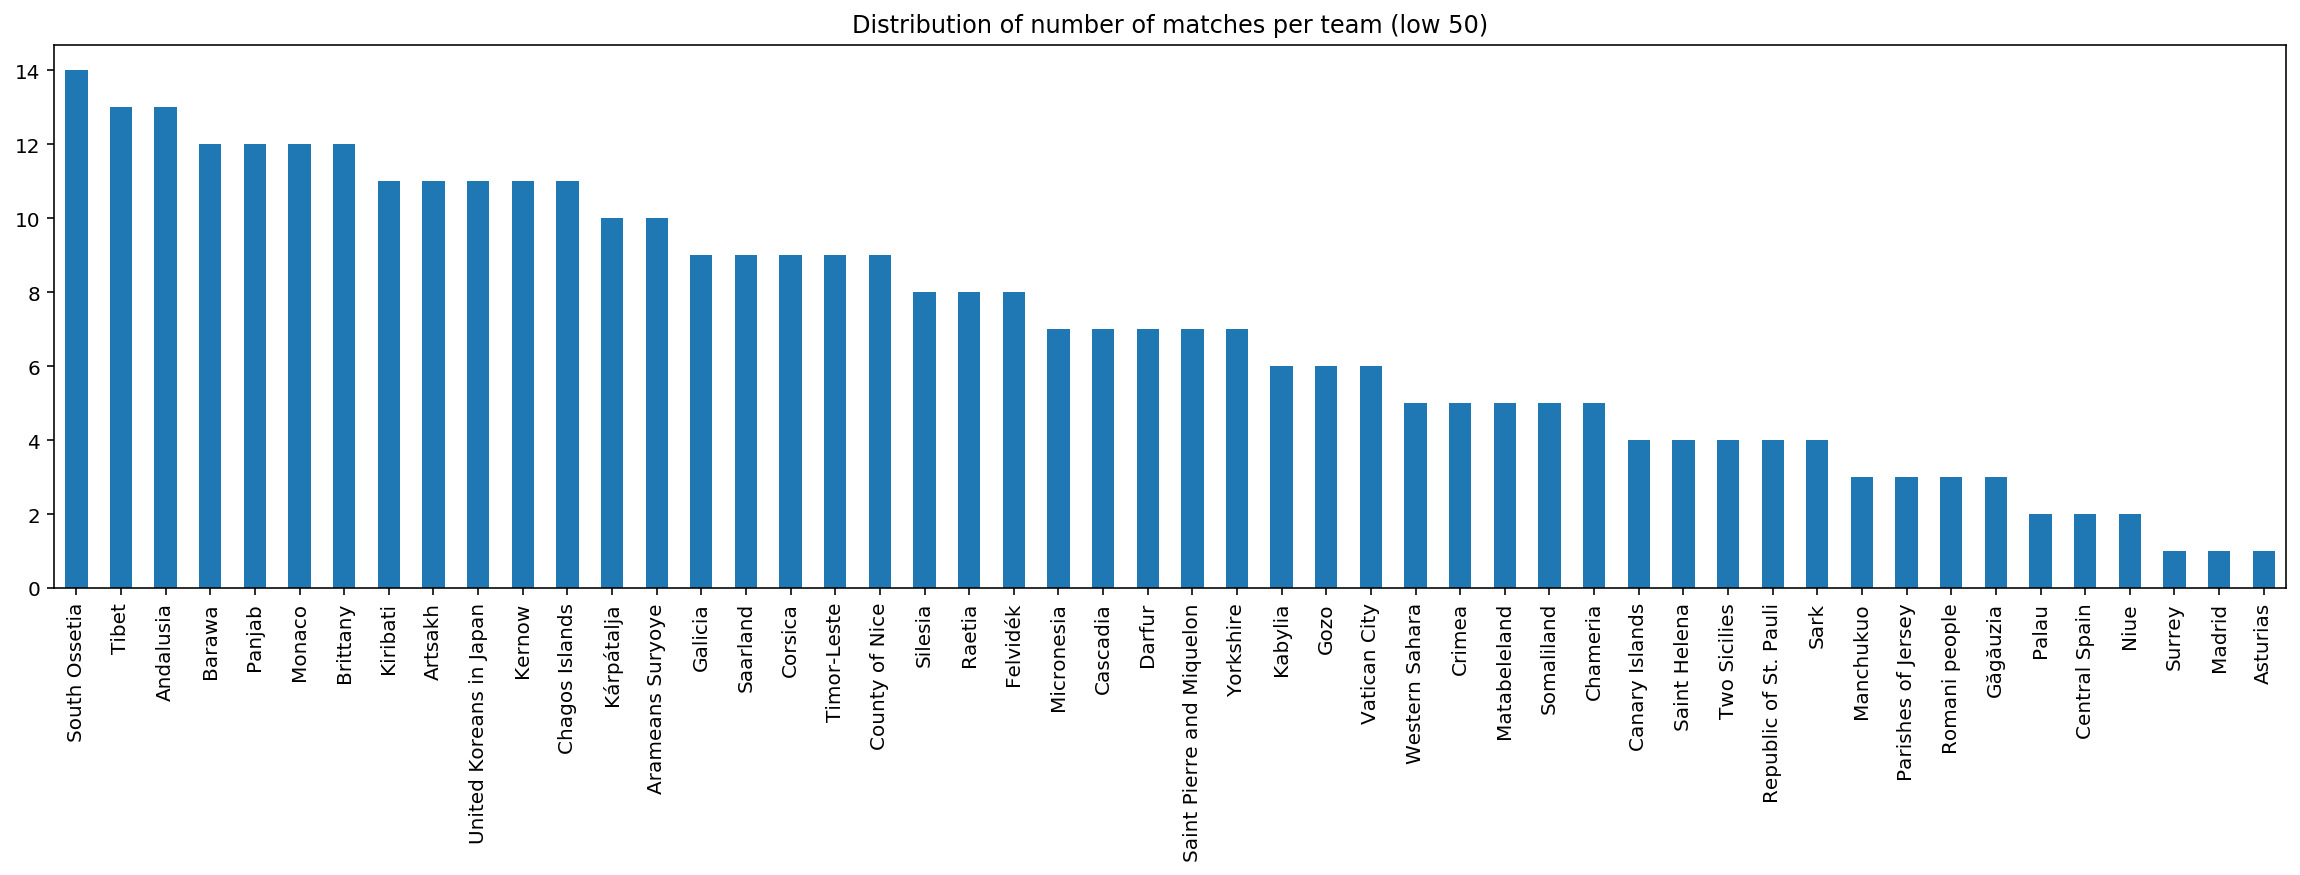

In [73]:
match_participants=pd.concat([data['home_team'],data['away_team']])
match_participants=match_participants.groupby(match_participants).count().sort_values(0, ascending=False)
pd.DataFrame(match_participants[:]).plot.bar(y=0,legend=False, figsize=(20,5),
                                                title='Distribution of number of matches per team')
f = plt.gca()
f.axes.get_xaxis().set_visible(False)
pd.DataFrame(match_participants[:50]).plot.bar(y=0,legend=False, figsize=(20,5),
                                               title='Distribution of number of matches per team (top 50)')
pd.DataFrame(match_participants[-50:]).plot.bar(y=0,legend=False, figsize=(20,5),
                                                title='Distribution of number of matches per team (low 50)')

plt.show()

In [74]:
pd.DataFrame(match_participants.describe()).T

,count,mean,std,min,25%,50%,75%,max
0,312.0,266.576923,258.50203,1.0,34.0,200.0,449.25,1018.0


We can observe a sharpe difference in the number of matches between the top 50 and low 50 teams. This explains the large standard deviation. In addition, we note that the teams playing the least are teams from very small countries, sometimes even regions or cities.


### Distribution of away matches per team (top and low 50)

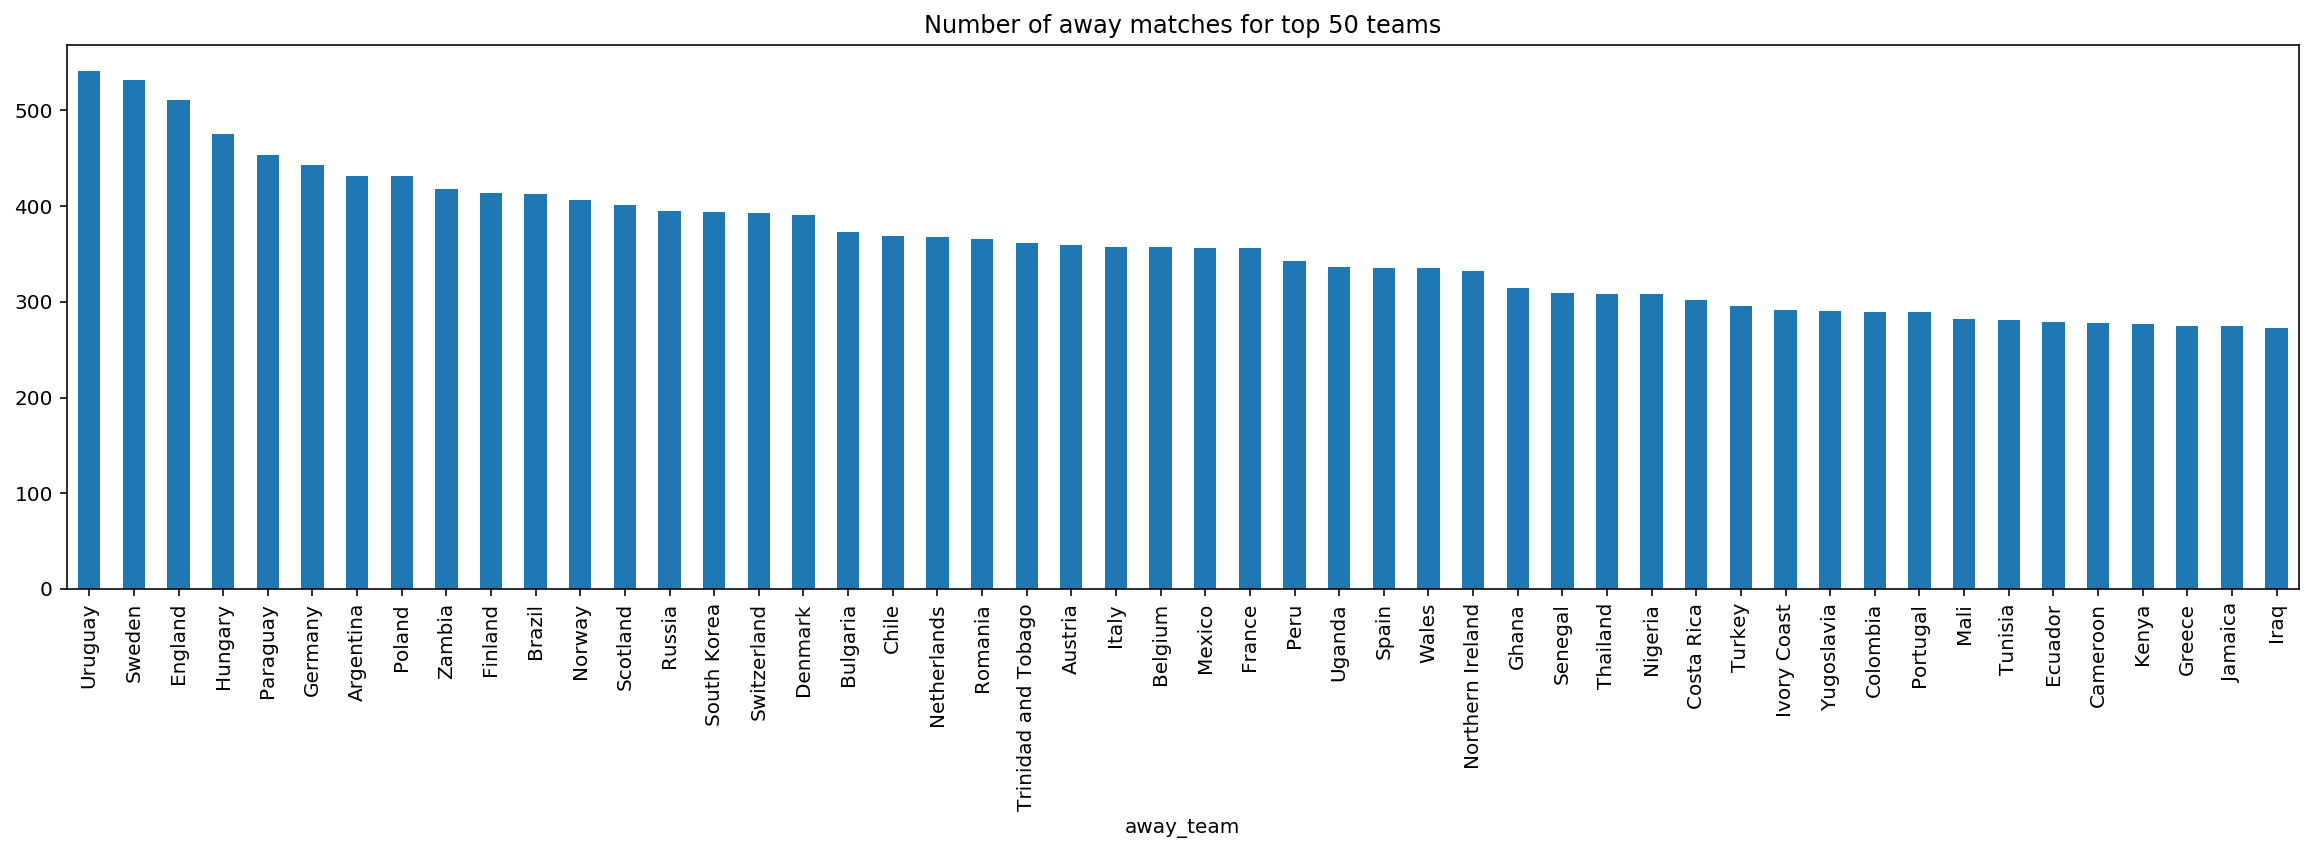

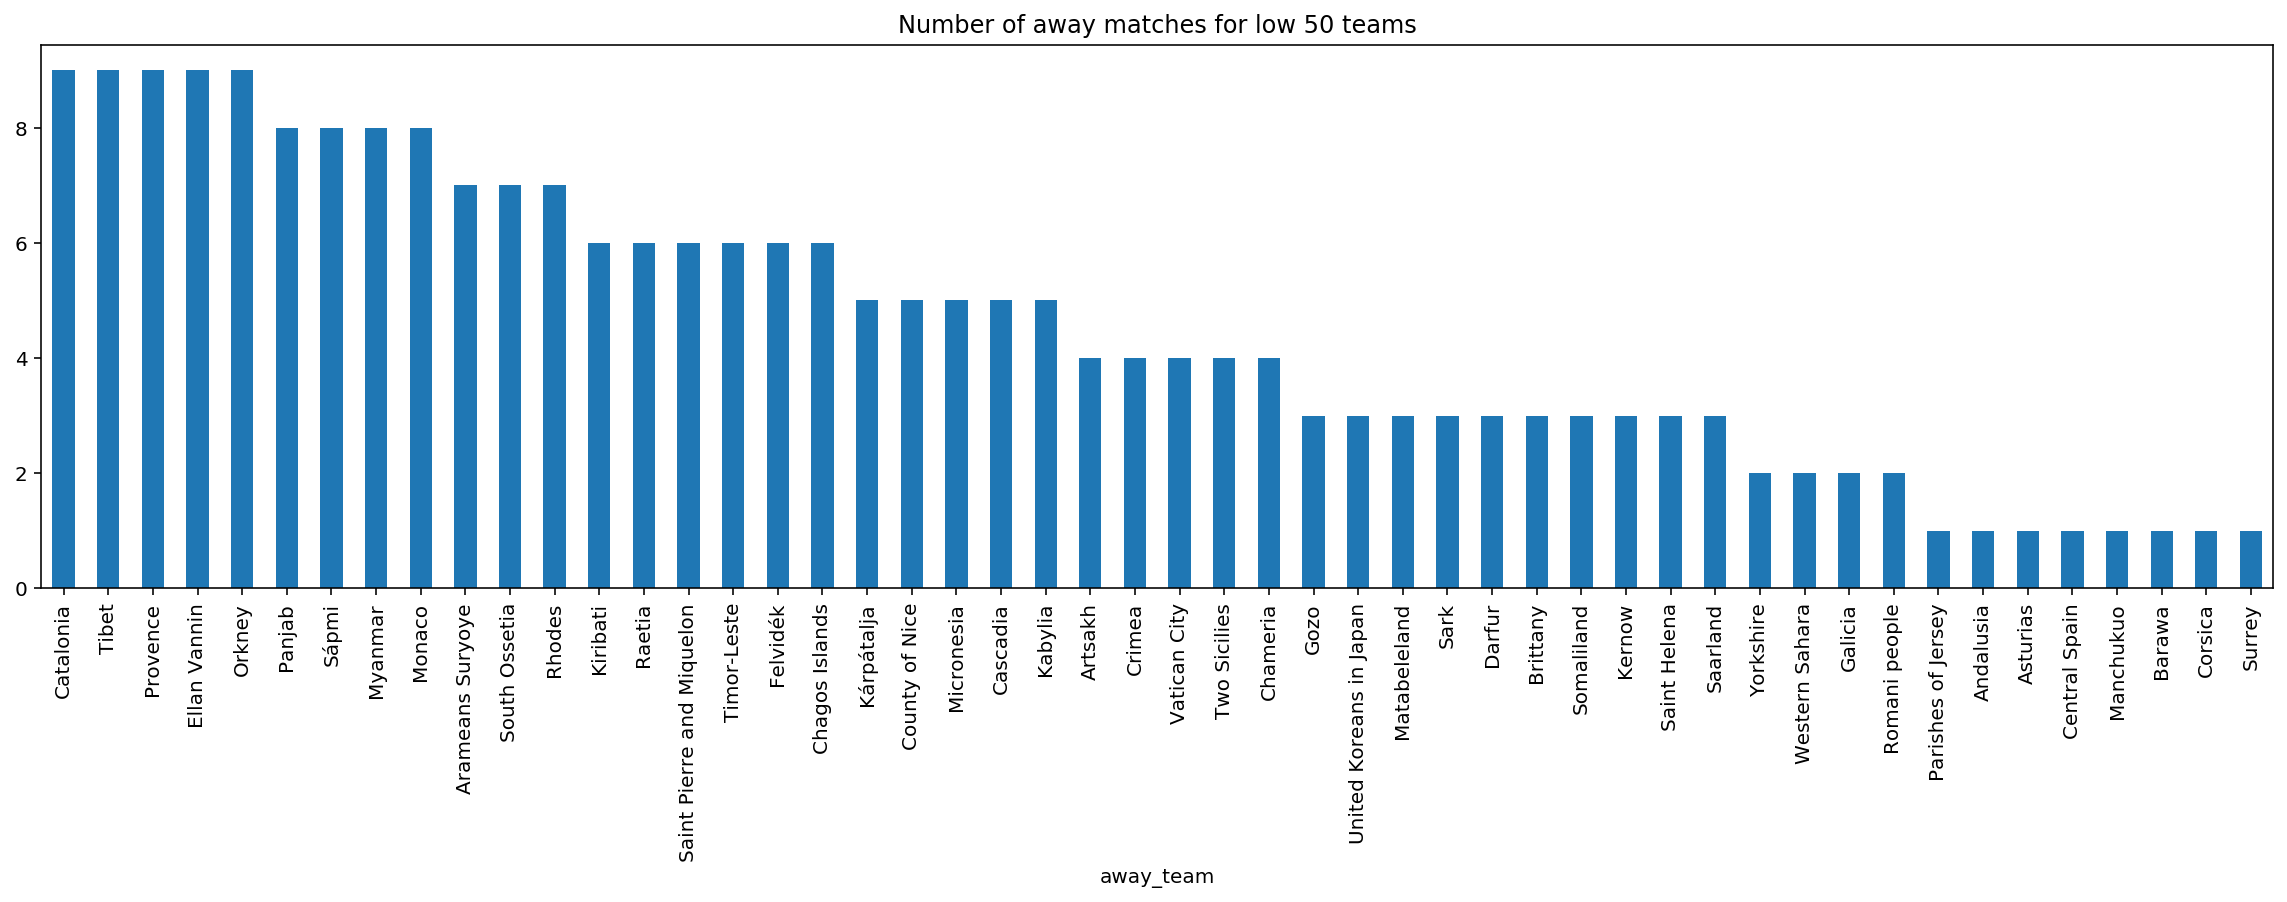

In [75]:
away_participants=data['away_team'].groupby(data['away_team']).count().sort_values(0, ascending=False)
pd.DataFrame(away_participants[:50]).plot.bar(y=0,legend=False, figsize=(20,5),
                                              title='Number of away matches for top 50 teams')
pd.DataFrame(away_participants[-50:]).plot.bar(y=0,legend=False, figsize=(20,5),
                                               title='Number of away matches for low 50 teams')
plt.show()

### Distribution of home matches per country (top and low 50)


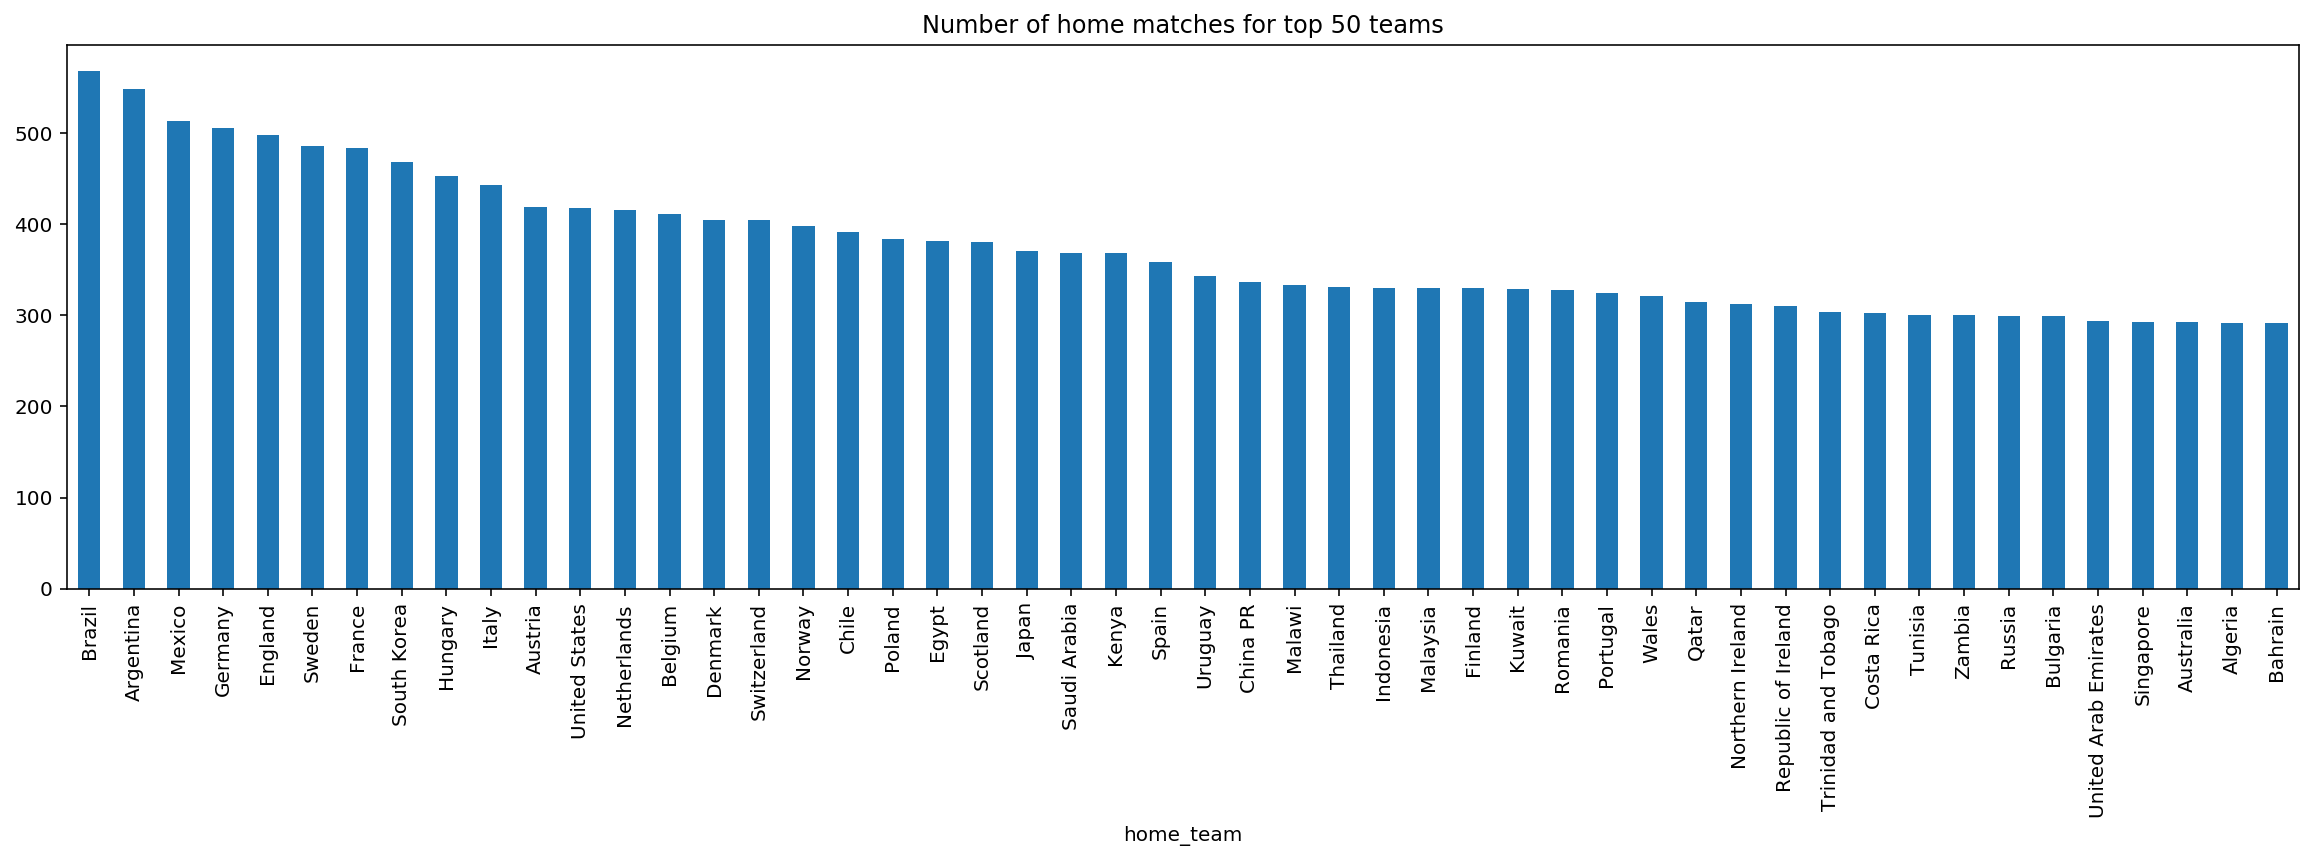

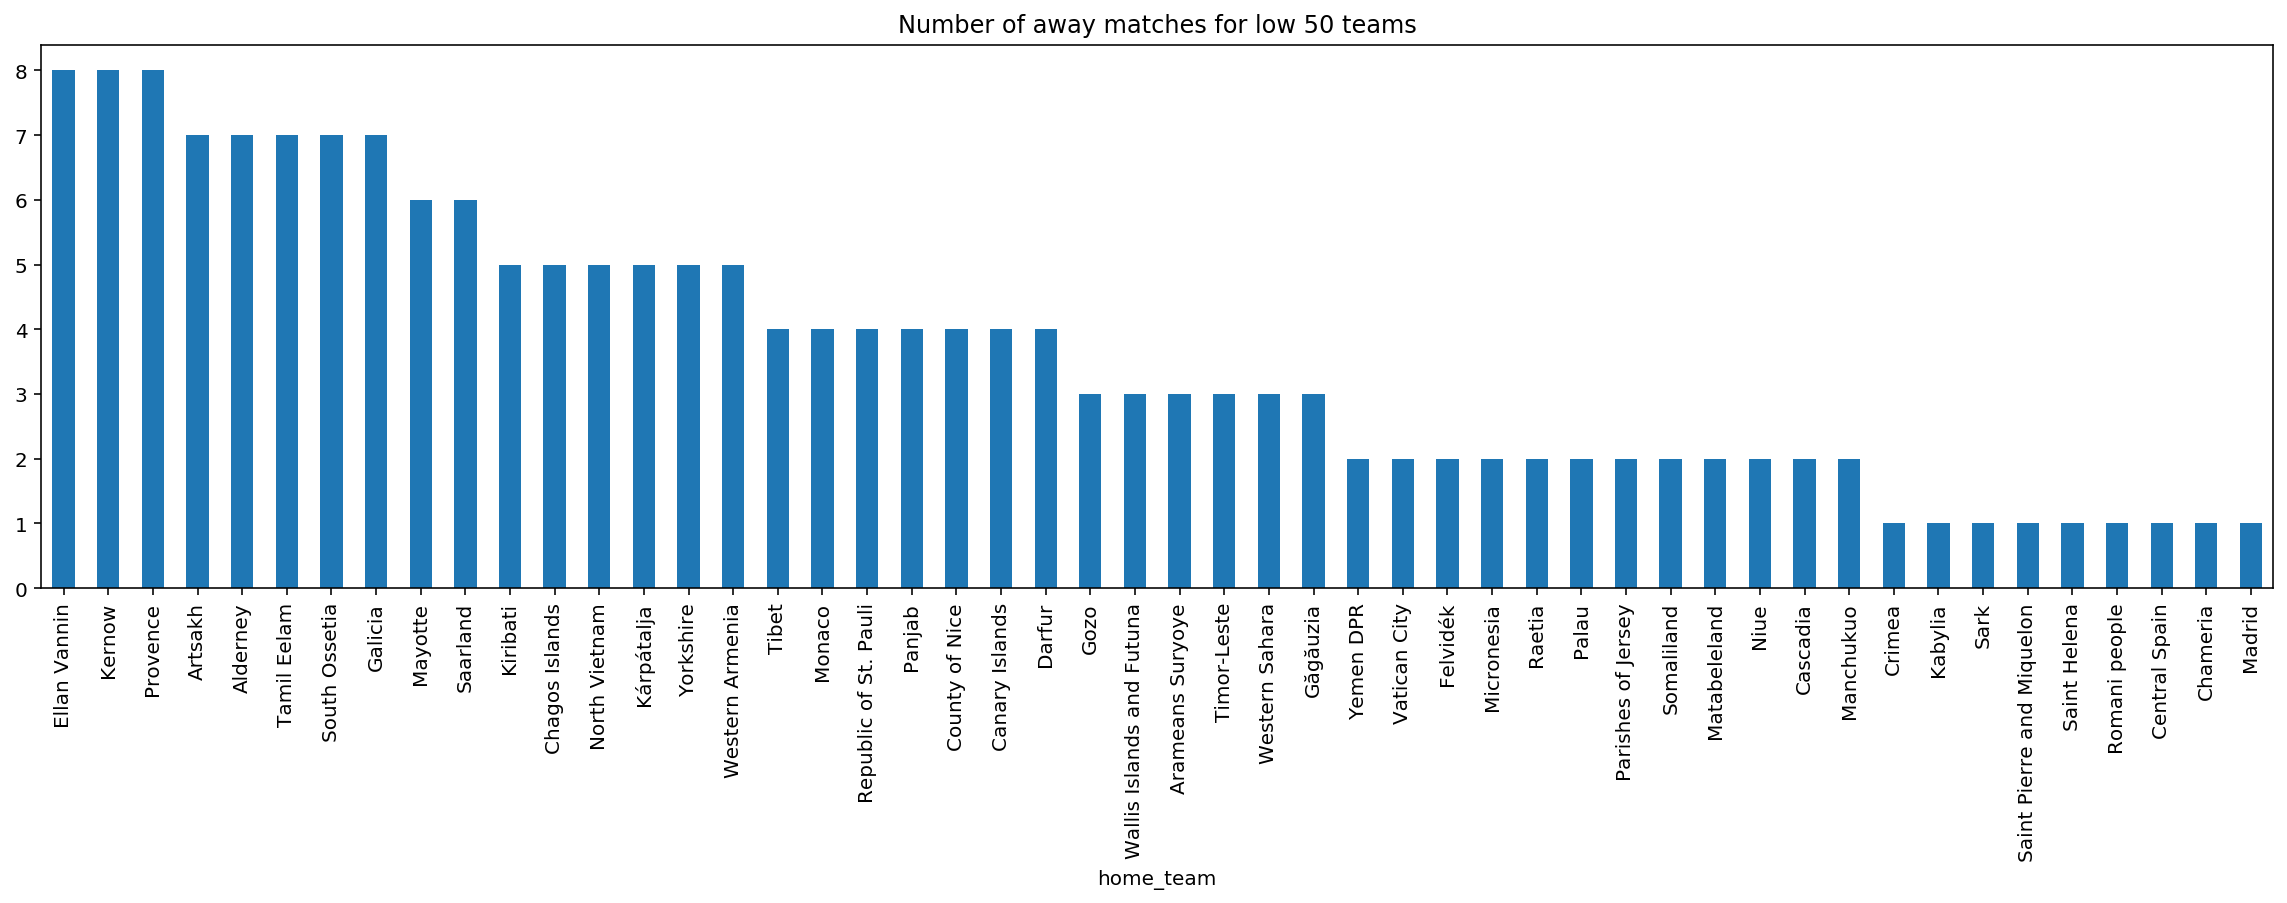

In [76]:
home_participants=data['home_team'].groupby(data['home_team']).count().sort_values(0, ascending=False)
pd.DataFrame(home_participants[:50]).plot.bar(y=0,legend=False, figsize=(20,5),
                                              title='Number of home matches for top 50 teams')

pd.DataFrame(home_participants[-50:]).plot.bar(y=0,legend=False, figsize=(20,5),
                                              title='Number of away matches for low 50 teams')
plt.show()

Teams seem to have distinct policies when it comes to away and home encounters.

___
## Scores
### Distribution of the final scores per team

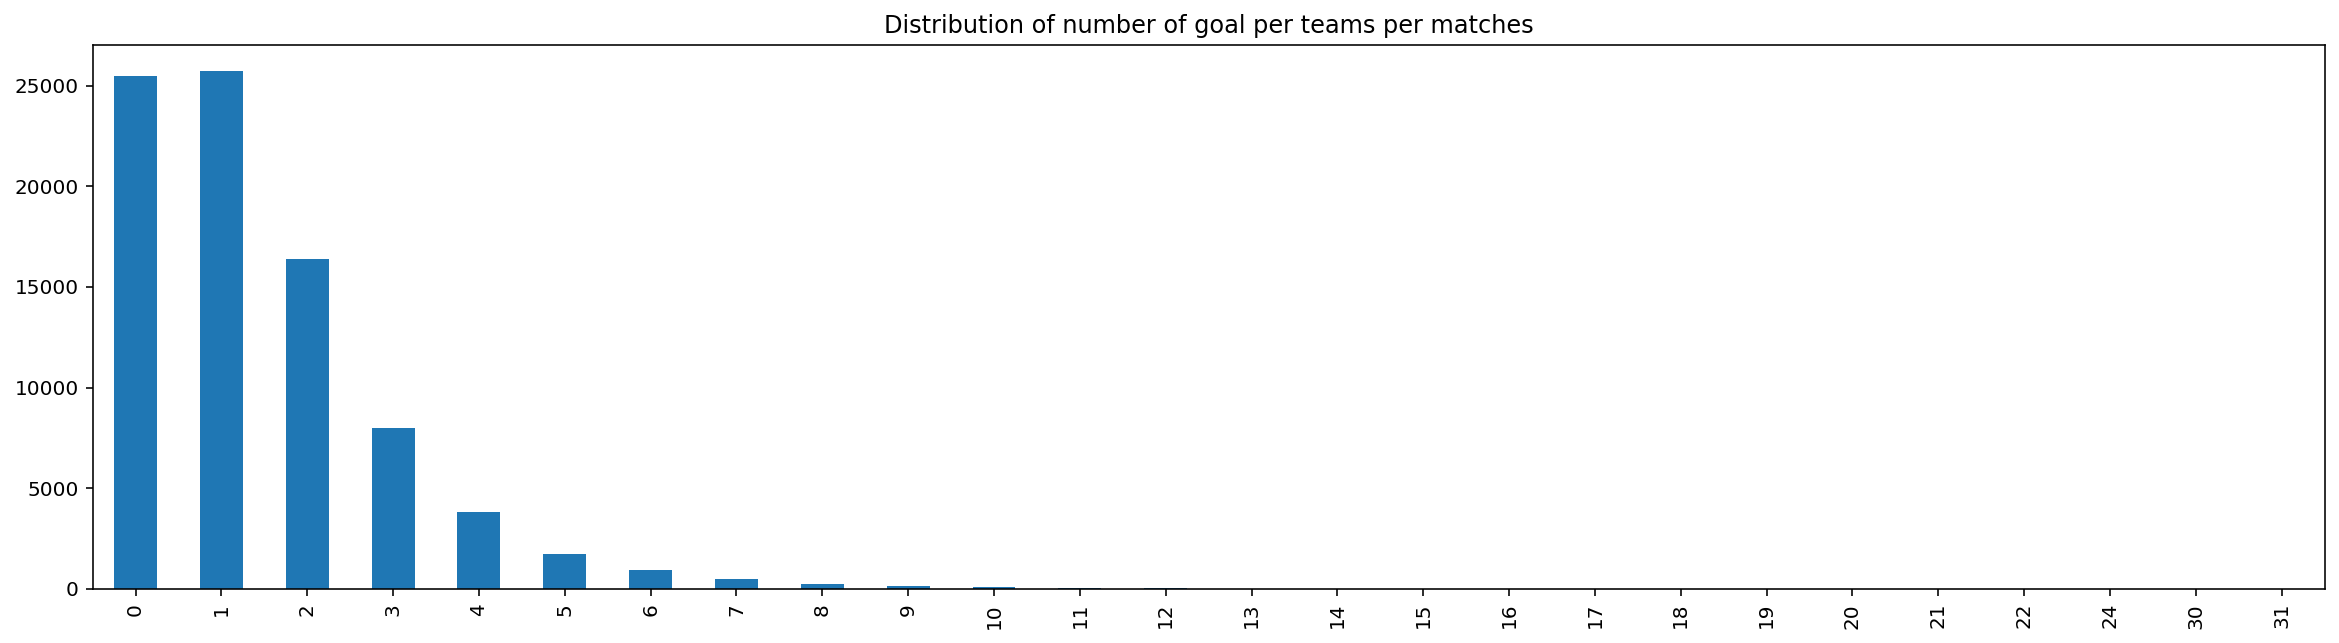

In [77]:
final_scores=pd.concat([data['home_score'],data['away_score']])
final_score_count=final_scores.groupby(final_scores).count()
pd.DataFrame(final_score_count).plot.bar(y=0,legend=False, figsize=(20,5),
                                              title='Distribution of number of goal per teams per matches')
plt.show()

The distribution seems to follow an exponential distribution.

### Teams score general stats


In [78]:
pd.DataFrame(final_scores.describe()).T

,count,mean,std,min,25%,50%,75%,max
0,83172.0,1.466671,1.613443,0.0,0.0,1.0,2.0,31.0


The likelihood of each score decreases exponentially with the number of goals. Let's look at the number of goals per game (away + home score):

### Total Score

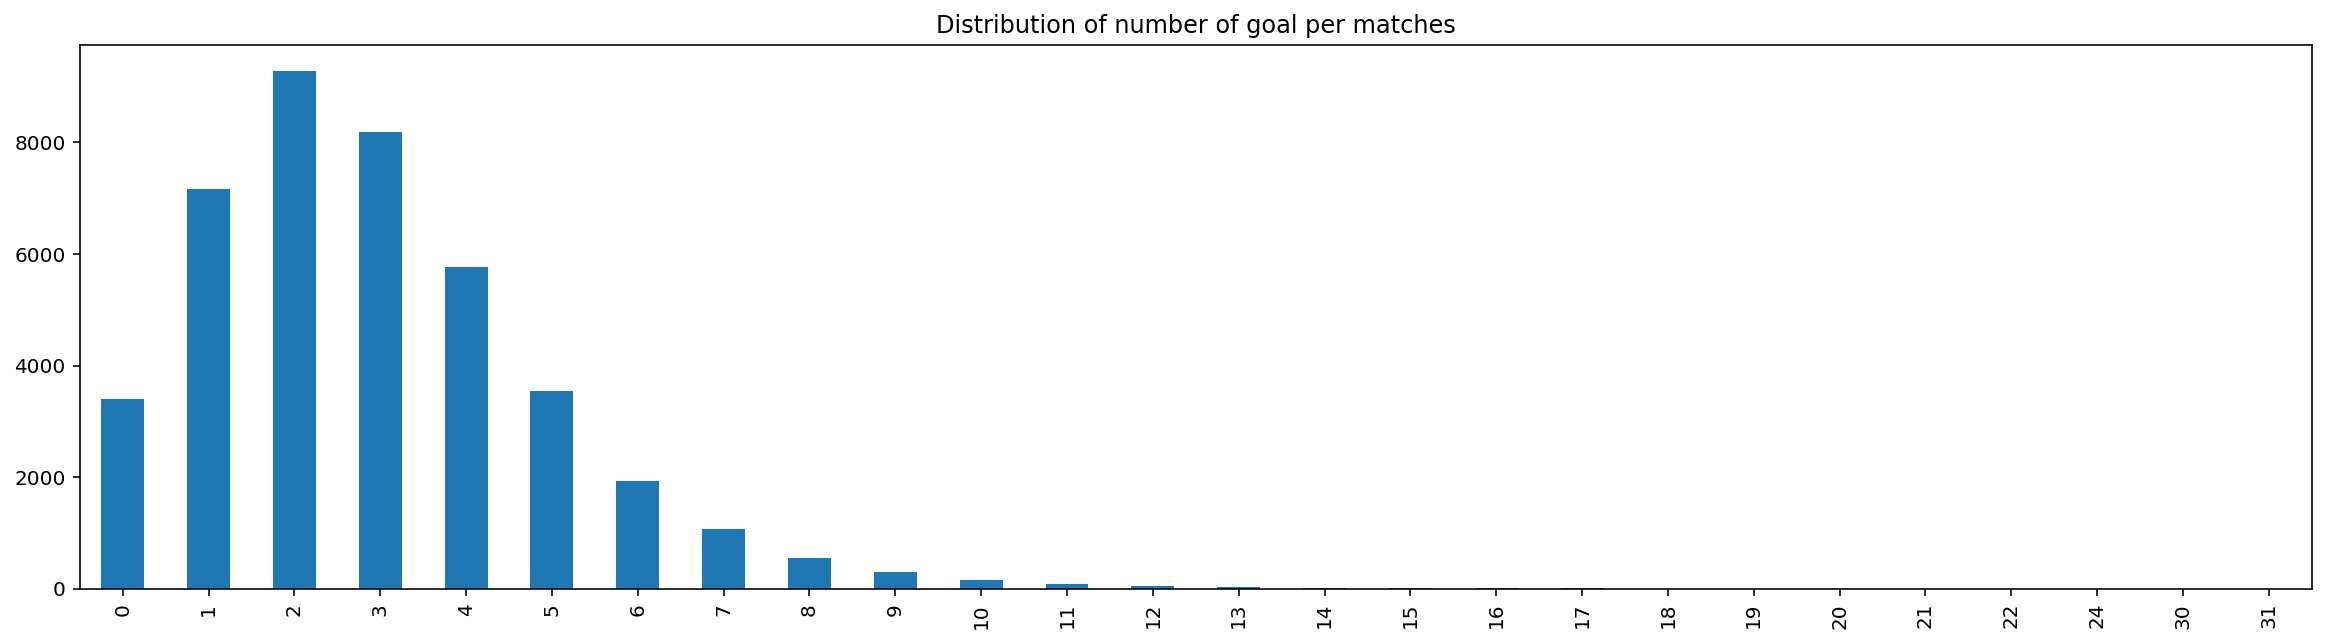

In [79]:
total_scores = data['home_score'] + data['away_score']
total_scores_count=total_scores.groupby(total_scores).count()
pd.DataFrame(total_scores_count).plot.bar(y=0,legend=False, figsize=(20,5),
                                              title='Distribution of number of goal per matches')
plt.show()

The final score of seems to follow an Erlang distribution, which is normal because it is the distribution of the sum of k independent and identically distributed random variables according to an exponential law. Here we sum up what looks like two exponential iid exponential variables: the number of goals per game for both team.

### Total score general stats


In [80]:
pd.DataFrame(total_scores.describe()).T

,count,mean,std,min,25%,50%,75%,max
0,41586.0,2.933343,2.092804,0.0,1.0,3.0,4.0,31.0


It might be interesting to see which games had the highest scores:

### Highest scores

In [81]:
indices = total_scores.sort_values(0, ascending=False).index
data.iloc[indices[:10]]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
23796,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
7902,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False
10949,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False
23793,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
28838,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True
27373,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Chinese Taipei,True
36020,2014-06-01,Darfur,Padania,0,20,CONIFA World Football Cup,Östersund,Sweden,True
25694,2003-06-30,Sark,Isle of Wight,0,20,Island Games,St. Martin,Guernsey,True
14720,1987-12-15,American Samoa,Papua New Guinea,0,20,South Pacific Games,Nouméa,New Caledonia,True
22567,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False


___
## Types of matches

### Repartition of friendly vs competitive matches

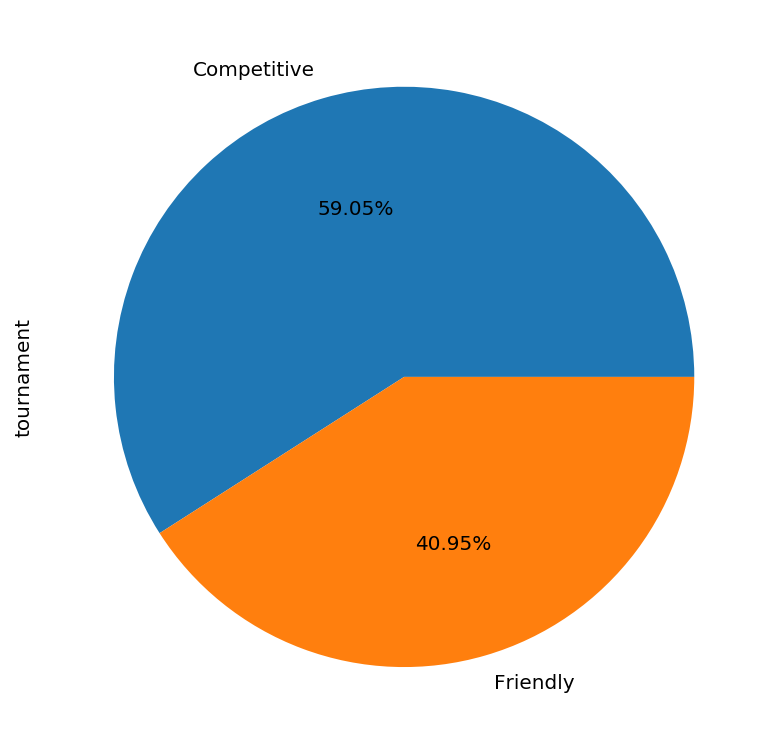

In [82]:
f_vs_c=data['tournament'].copy()
f_vs_c[f_vs_c!='Friendly']='Competitive'
pd.DataFrame(f_vs_c).groupby(f_vs_c).count().plot.pie(y=0, autopct='%1.2f%%', startangle=0, legend=False, figsize=(6.5, 8))
plt.show()

Most competitive matches are organized by the FIFA and a surpringly large amount of matches are friendly.


### Distribution of the matches per tournament

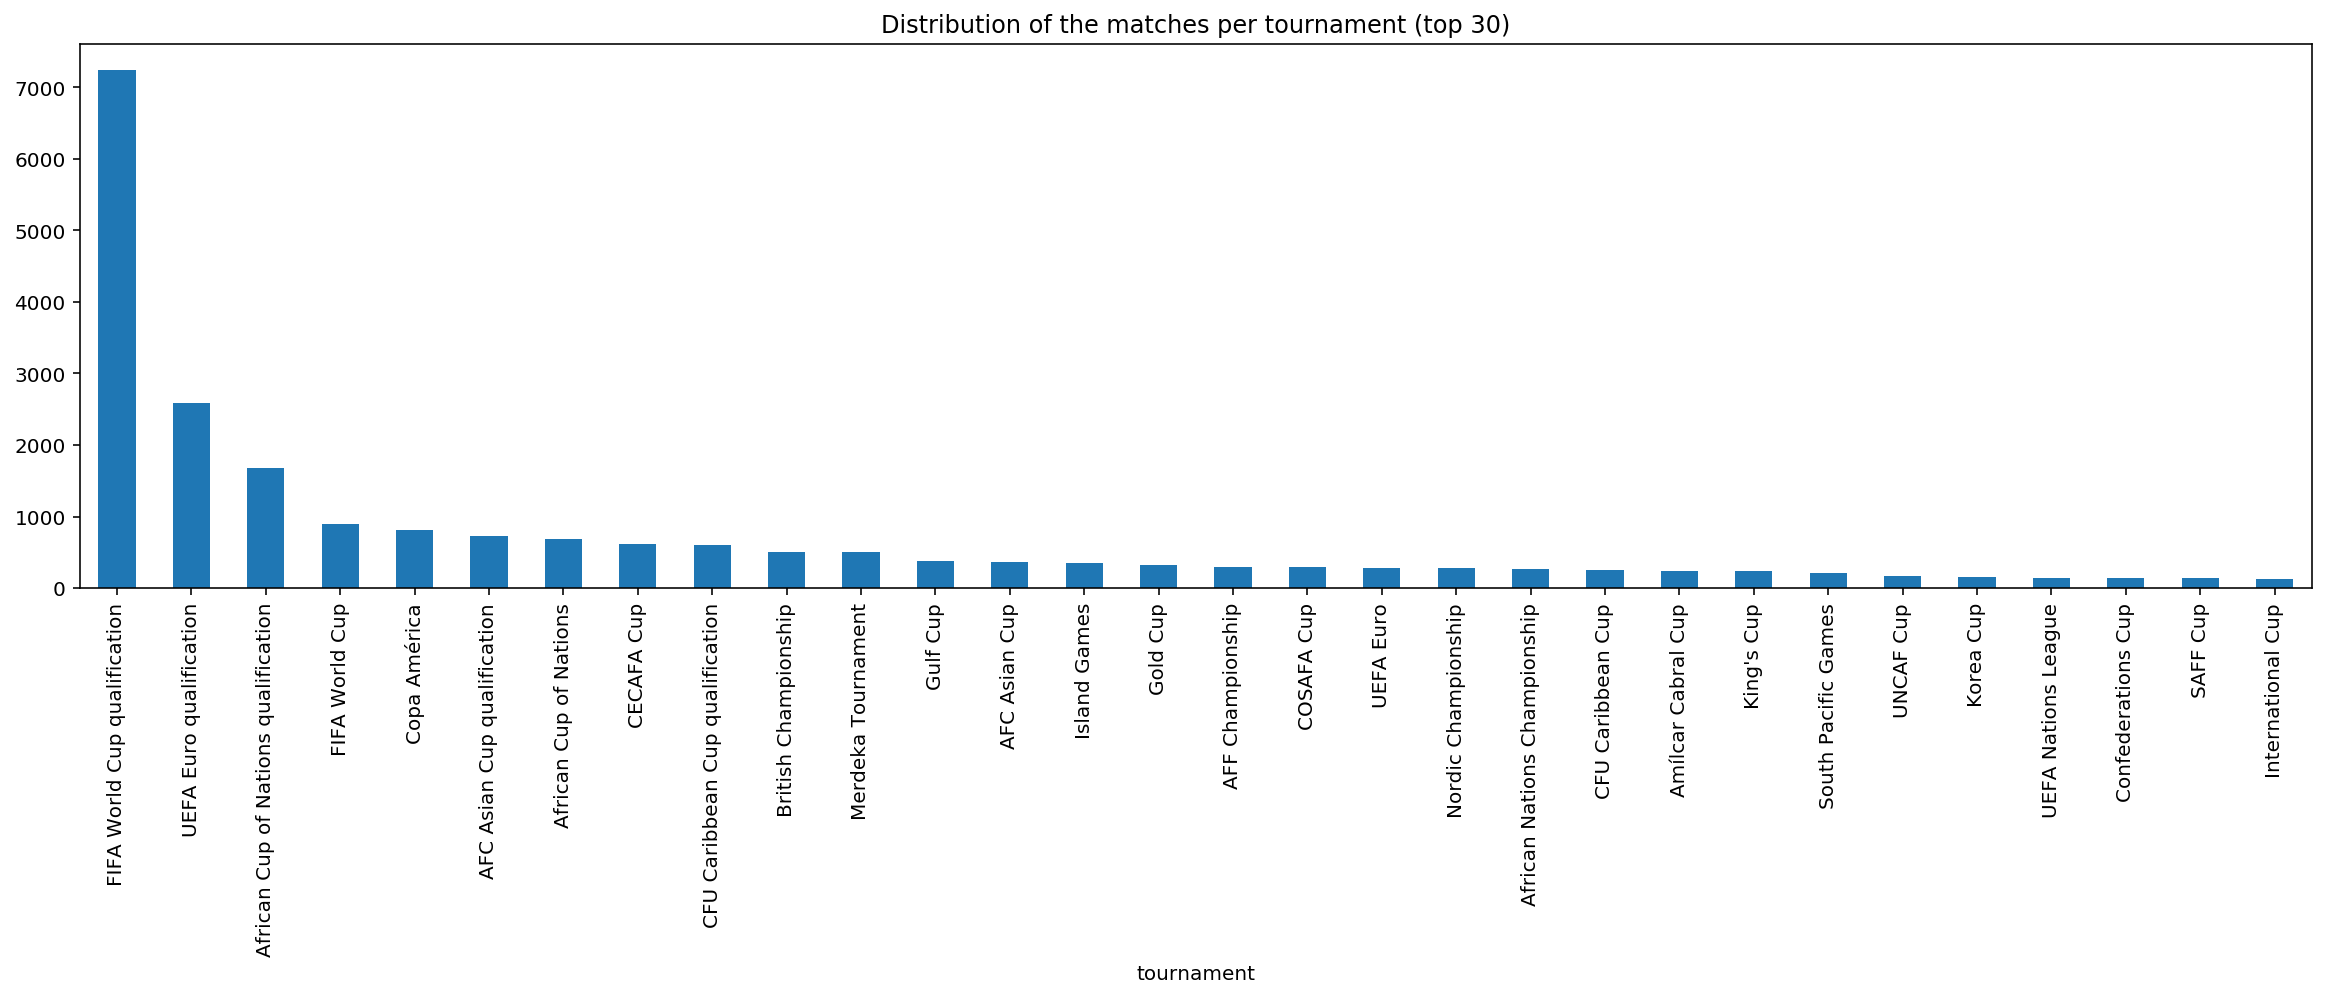

In [83]:
tournament_count=data['tournament'].groupby(data['tournament']).count().sort_values(0, ascending=False).drop('Friendly')
pd.DataFrame(tournament_count[:30]).plot.bar(y=0,legend=False, figsize=(20,5),
                                              title='Distribution of the matches per tournament (top 30)')
plt.show()

Majority of competitive international matches are FIFA World Cup qualifications matches. 
This is because the FIFA World Cup is the oldest competition still running today. 

Here are all international competitions:

In [84]:
tournament_list = sorted(data['tournament'].unique())
a = [print('•', i, end=' ') for i in tournament_list]
print('\n\nNumber of competitions:', len(tournament_list))

• ABCS Tournament • AFC Asian Cup • AFC Asian Cup qualification • AFC Challenge Cup • AFC Challenge Cup qualification • AFF Championship • AFF Championship qualification • African Cup of Nations • African Cup of Nations qualification • African Nations Championship • African Nations Championship qualification • Amílcar Cabral Cup • Atlantic Cup • Atlantic Heritage Cup • Balkan Cup • Baltic Cup • Brazil Independence Cup • British Championship • CCCF Championship • CECAFA Cup • CFU Caribbean Cup • CFU Caribbean Cup qualification • CONCACAF Championship • CONCACAF Championship qualification • CONCACAF Nations League • CONCACAF Nations League qualification • CONIFA European Football Cup • CONIFA World Football Cup • COSAFA Cup • Confederations Cup • Copa América • Copa América qualification • Copa Artigas • Copa Bernardo O'Higgins • Copa Carlos Dittborn • Copa Chevallier Boutell • Copa Félix Bogado • Copa Juan Pinto Durán • Copa Lipton • Copa Newton • Copa Oswaldo Cruz • Copa Paz del Chaco 

Let's take a closer look at the biggest competition: the FIFA World Cup.

### FIFA World Cup stats

In [85]:
WC_data = data[data.tournament == 'FIFA World Cup']
WC_data.tail(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
39948,2018-07-14,Belgium,England,2,0,FIFA World Cup,St. Petersburg,Russia,True
39949,2018-07-15,France,Croatia,4,2,FIFA World Cup,Moscow,Russia,True


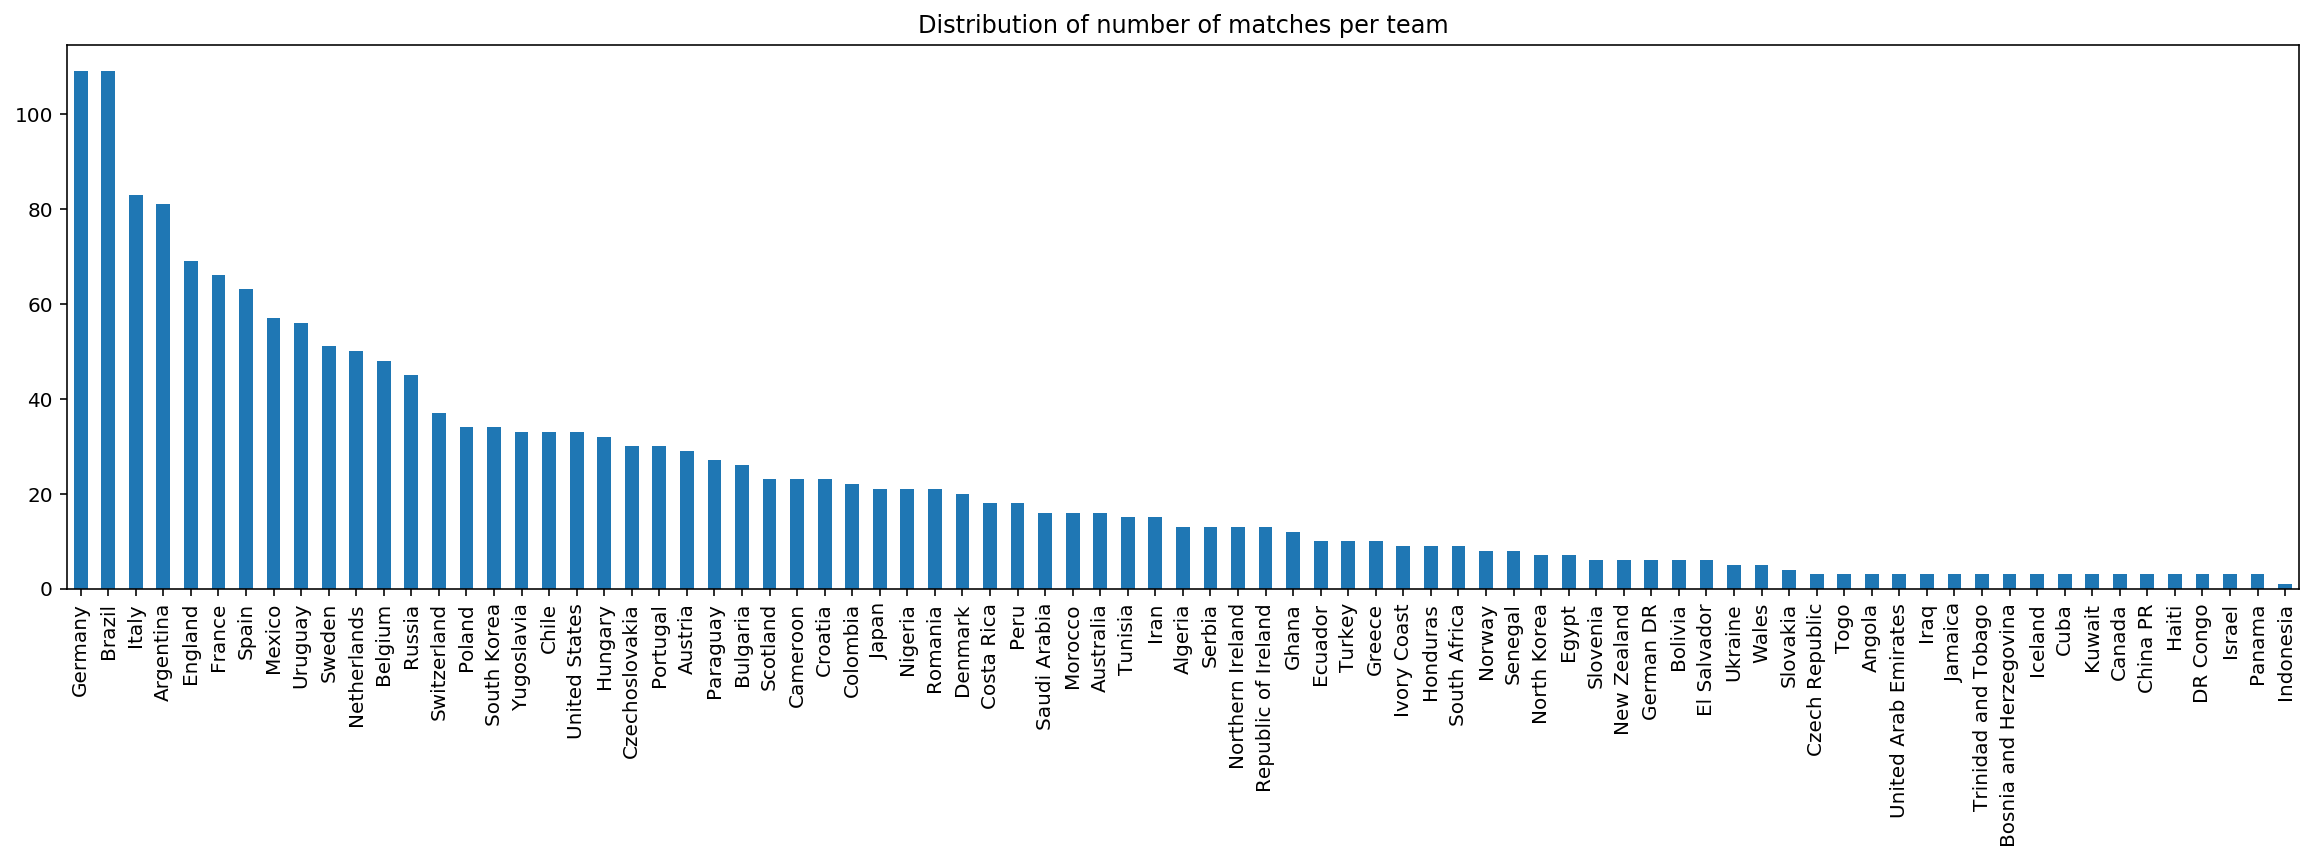

In [86]:
WC_match_participants=pd.concat([WC_data['home_team'],WC_data['away_team']])
WC_match_participants_count=WC_match_participants.groupby(WC_match_participants).count().sort_values(0, ascending=False)
pd.DataFrame(WC_match_participants_count).plot.bar(y=0,legend=False, figsize=(20,5),
                                                title='Distribution of number of matches per team')
plt.show()

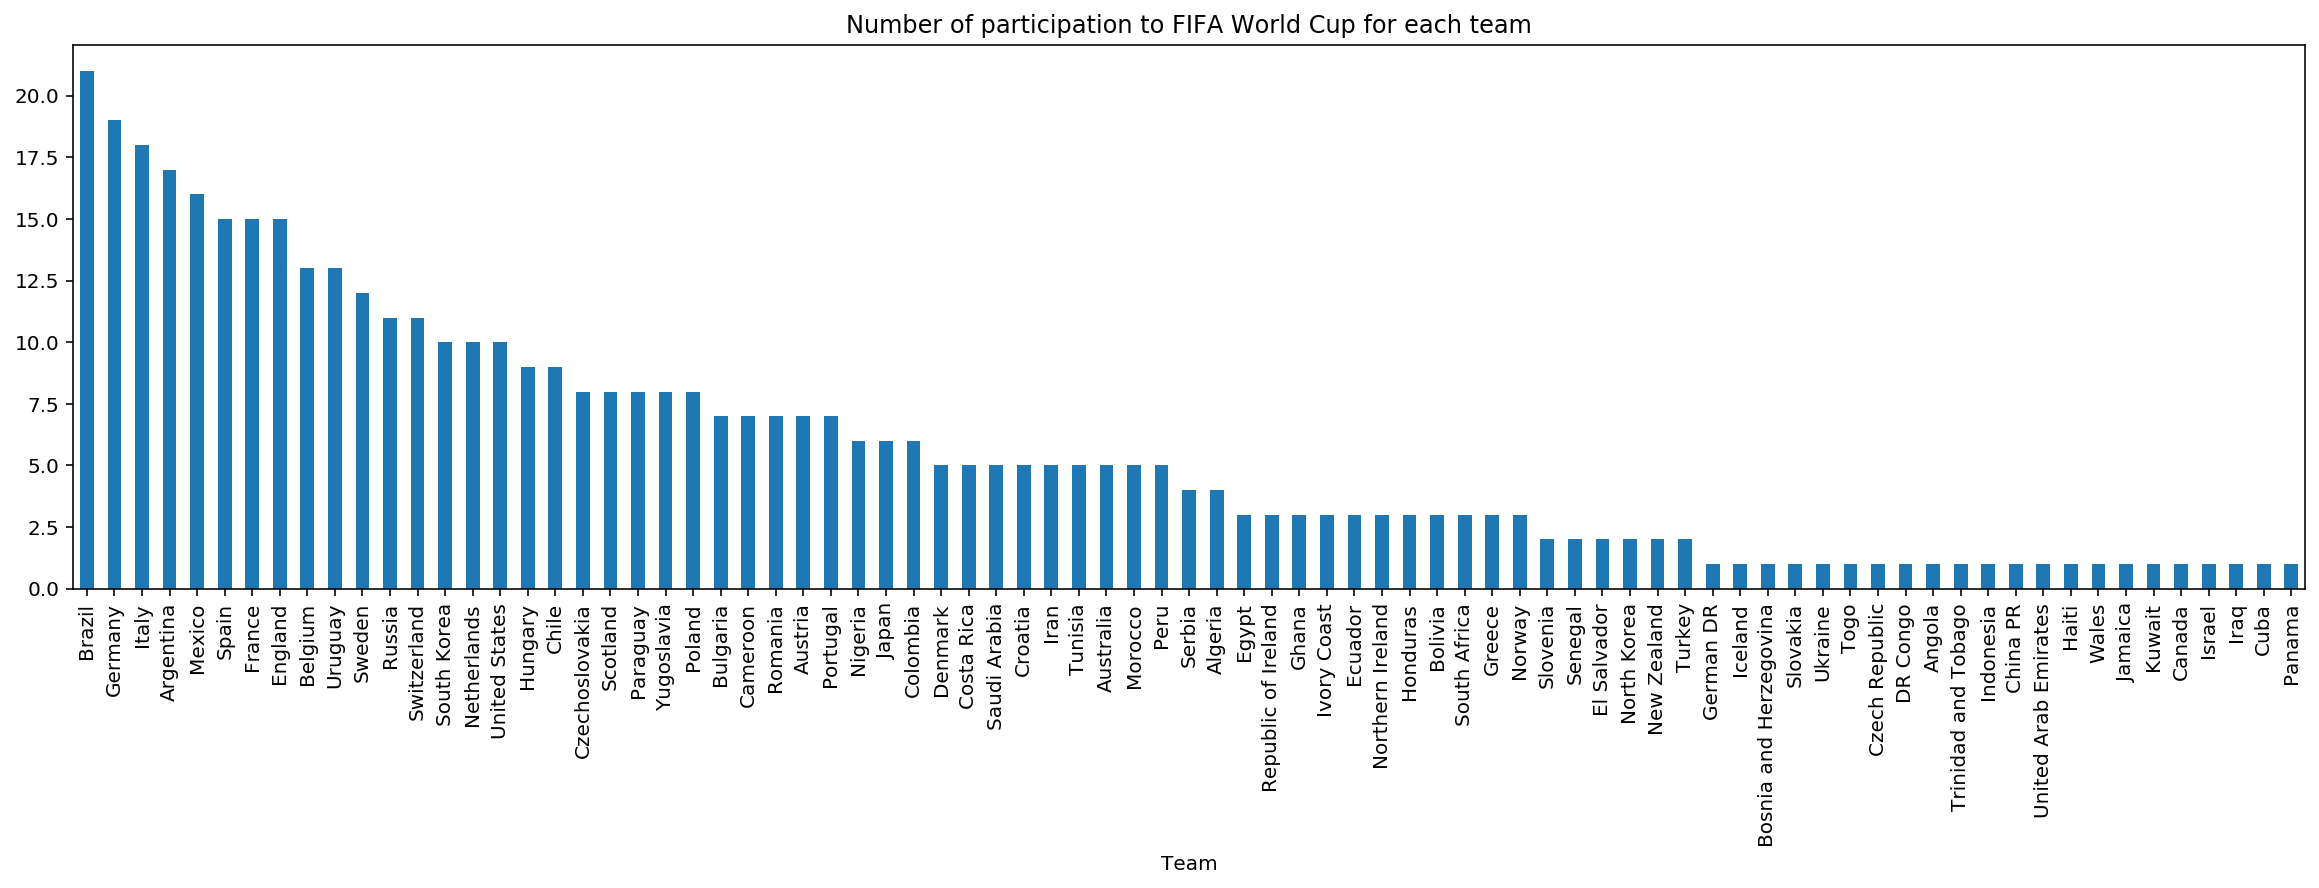

In [87]:
def append(dic, team):
    if team not in dic:
        dic[team] = []
        dic[team].append(1)
        dic[team].append(row.date[:4])
    if row.date[:4] not in dic[team]:
        dic[team][0] += 1
        dic[team].append(row.date[:4])
    return dic

dic = {}
date = []
for i in range(len(WC_data)):
    row = WC_data.iloc[i]
    team = row.home_team
    dic = append(dic, team)
    team = row.away_team
    dic = append(dic, team)
for e in dic:
    dic[e] = dic[e][0]
    
WC_participation = pd.DataFrame(dic.items())
WC_participation.columns = ['Team', 'Participations']
WC_participation = WC_participation.set_index(['Team'])
WC_participation=WC_participation.sort_values(by=['Participations'], ascending=False)
pd.DataFrame(WC_participation).plot.bar(y=0,legend=False, figsize=(20,5),
                                                title='Number of participation to FIFA World Cup for each team')
plt.show()

Brazil, Germany and Italy are the countries that have participated the most in World Cups. This is why they are at the top of the list of countries that have played the most games in the World Cup: these two pieces of information are correlated.

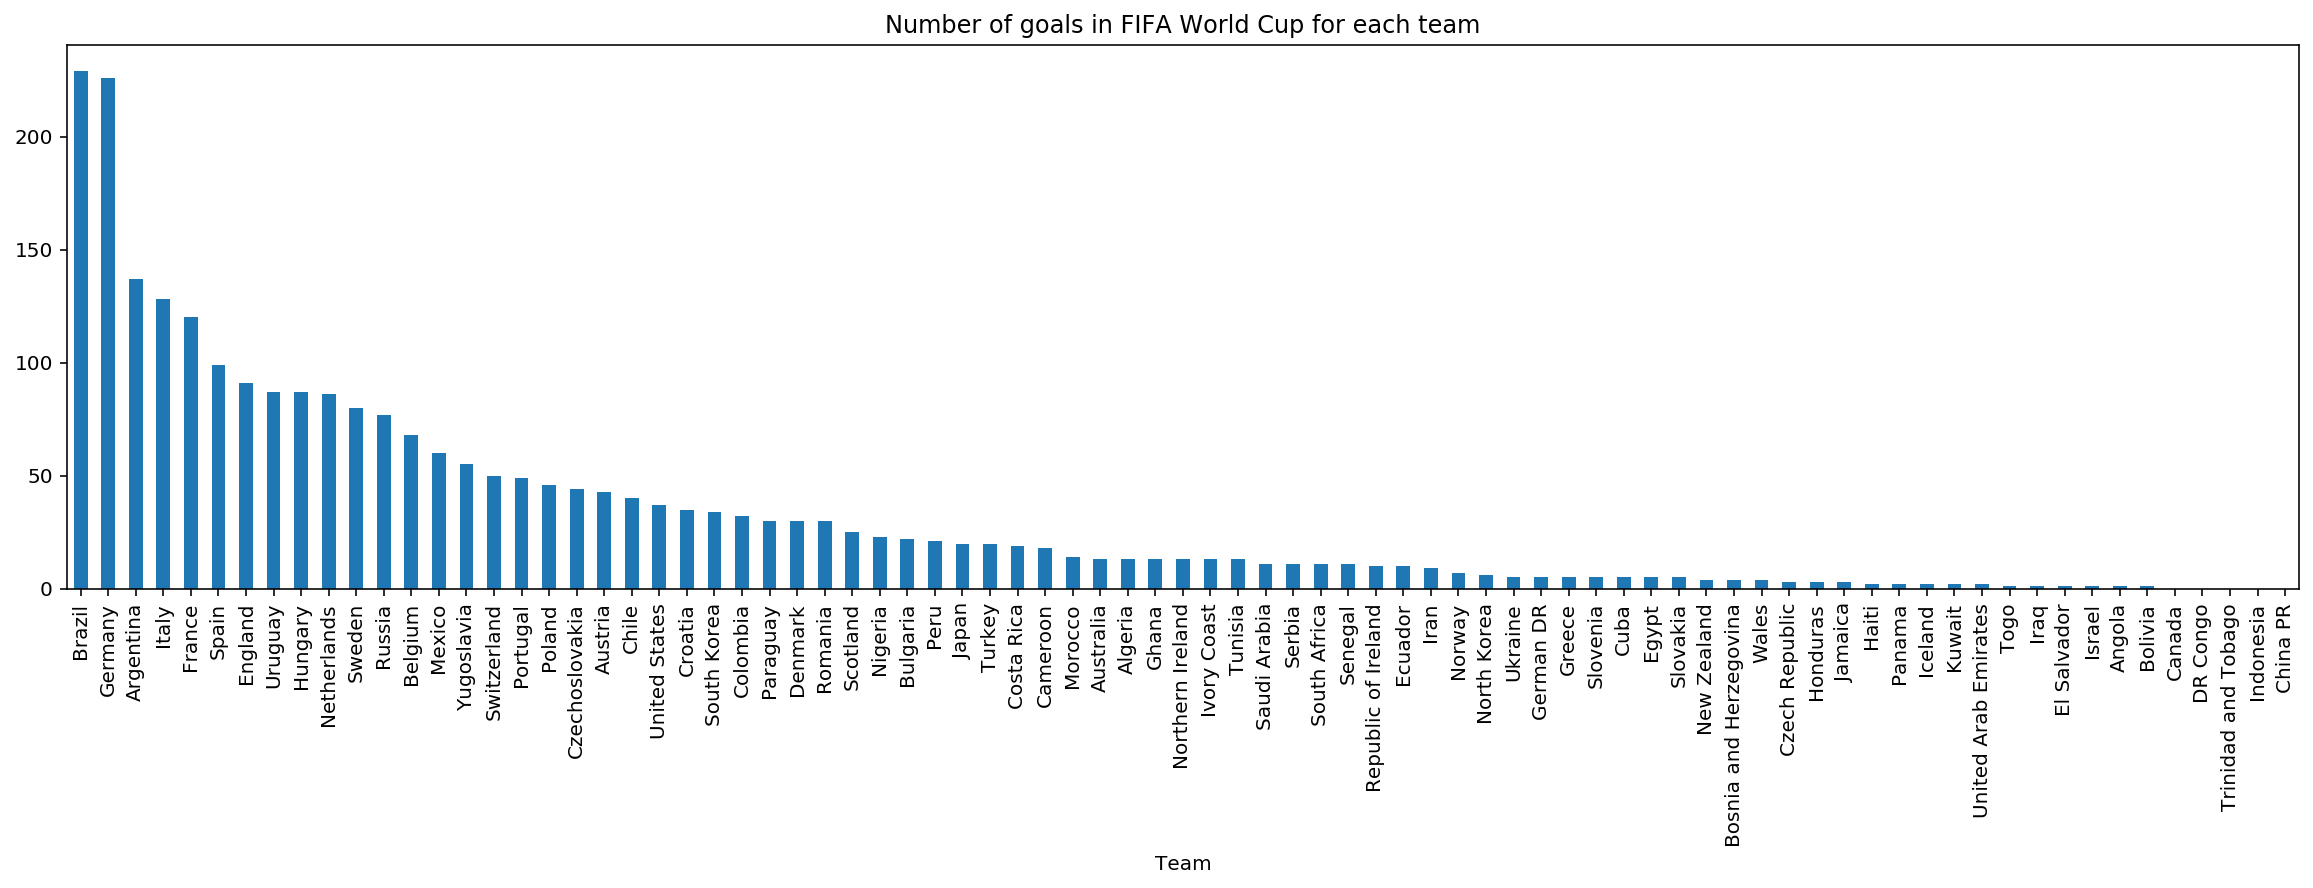

In [88]:
nb_goals = [(WC_data[WC_data['home_team']==team]).home_score.sum()+(WC_data[WC_data['away_team']==team]).away_score.sum() for team in list(WC_match_participants.unique())] 
    
WC_goals = {'Team': list(WC_match_participants.unique()), 'Goals': nb_goals}
WC_goals = pd.DataFrame.from_dict(WC_goals, orient='index').T.set_index(['Team'])
WC_goals=WC_goals.sort_values(by=['Goals'], ascending=False)
pd.DataFrame(WC_goals).plot.bar(y=0,legend=False, figsize=(20,5),
                                               title='Number of goals in FIFA World Cup for each team')
plt.show()

On the contrary, a high number of participation does not necessarily imply a high number of goals, Mexico is a good example. This information is less correlated.

/Users/leobouraux/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



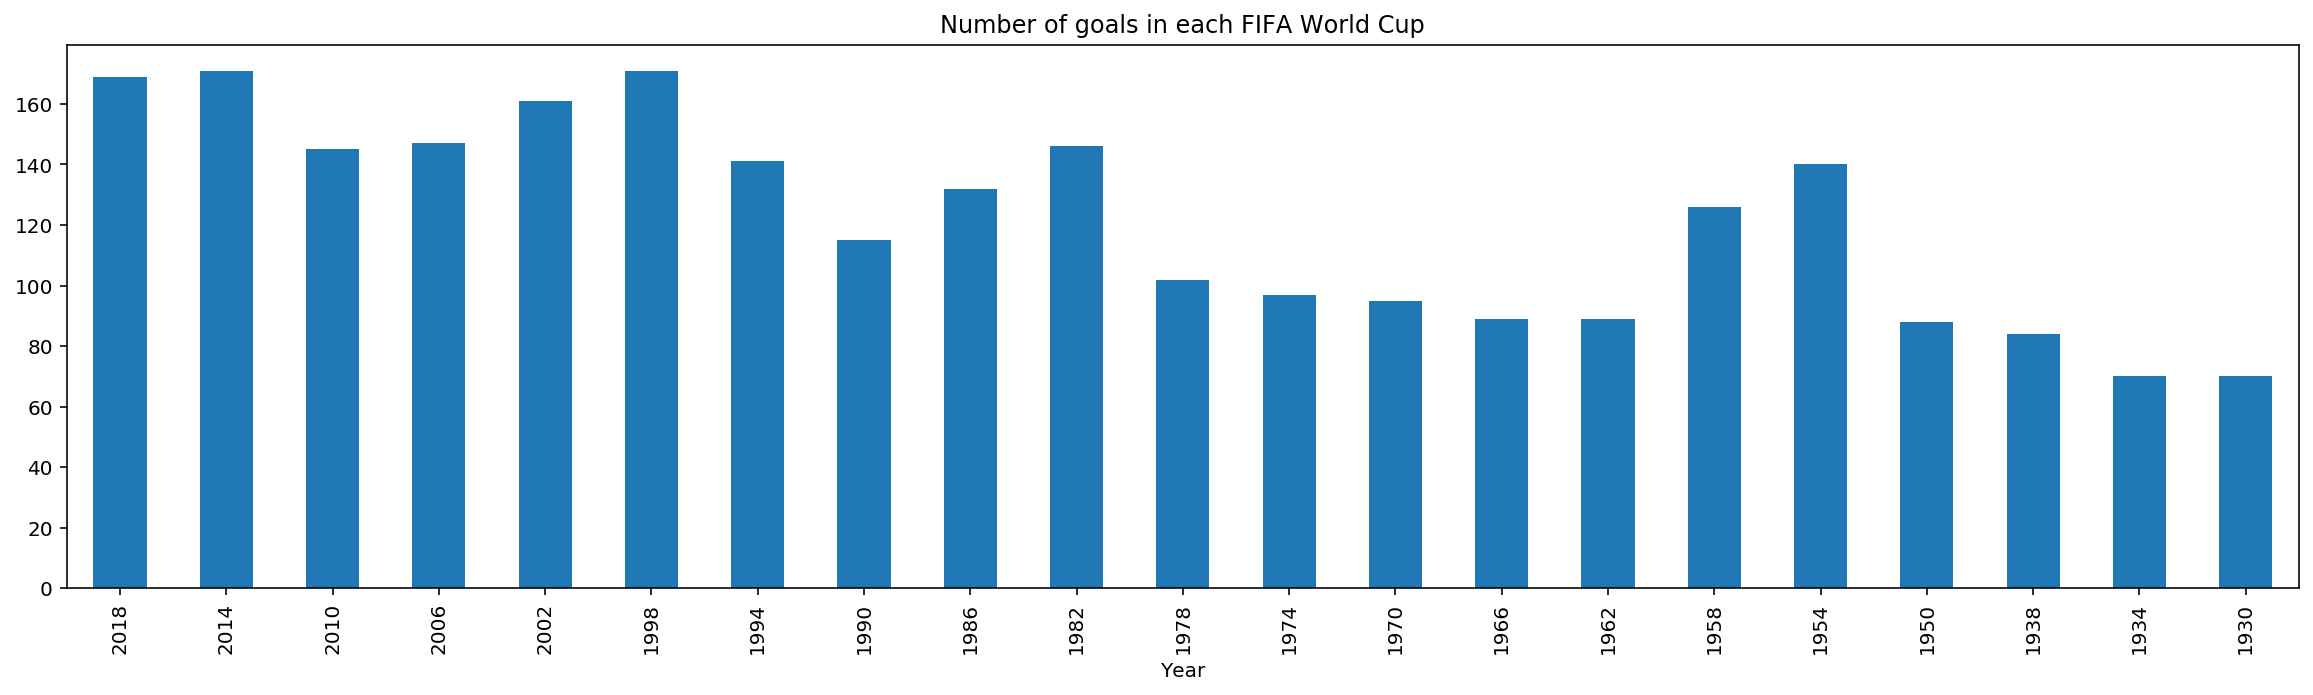

In [89]:
dates = sorted(list(set([d[:4] for d in list(WC_data['date'])])))[::-1]
WC_data['date'] = WC_data['date'].apply(lambda x: x[:4])
total = []
for d in dates:
    total.append( (WC_data[WC_data.date==d]).home_score.sum()+ (WC_data[WC_data.date==d]).away_score.sum())
WC_goals = {'Year': dates, 'Goals': total}
WC_goals = pd.DataFrame.from_dict(WC_goals, orient='index').T.set_index(['Year'])
pd.DataFrame(WC_goals).plot.bar(y=0,legend=False, figsize=(20,5),
                                               title='Number of goals in each FIFA World Cup')
plt.show()

In [90]:
teams = [len(set(WC_data[WC_data.date==d].away_team).union(set(WC_data[WC_data.date==d].home_team))) for d in dates]
participant = {'Year': dates, 'Participants': teams}
participant = pd.DataFrame.from_dict(participant, orient='index').T.set_index(['Year'])
display(participant.T)

Year,2018,2014,2010,2006,2002,1998,1994,1990,1986,1982,1978,1974,1970,1966,1962,1958,1954,1950,1938,1934,1930
Participants,32,32,32,32,32,32,24,24,24,24,16,16,16,16,16,16,16,13,15,16,13


More goals have been scored on the world cup in recent years, but this is due to a greater number of teams.

___
## Match location
### Distribution of match locations per country (top and low 50)


In [106]:
country_count = pd.DataFrame(data['country'].value_counts())
nb = country_count.loc["England"]  + country_count.loc["Scotland"] + country_count.loc["Wales"]
country_count.loc['United Kingdom'] = [nb.values.item()]

data3 = dict(type = 'choropleth', colorscale = 'Reds', locations = country_count.index,
            locationmode = 'country names', z = country_count['country'], text = country_count.index,
            colorbar = {'title':'Nb of hosted matches'})

layout3 = dict(title = 'Number of matches hosted by country',
               geo = dict(showframe = False, projection = {'type':'natural earth'}))

choromap3 = go.Figure([data3],layout3)
#choromap3.show()
choromap3

The United States are hosting a lot of matches even though they are not even in the top ten of the teams that have played the most. So we can think that it's mostly away games. Let's visualize this:

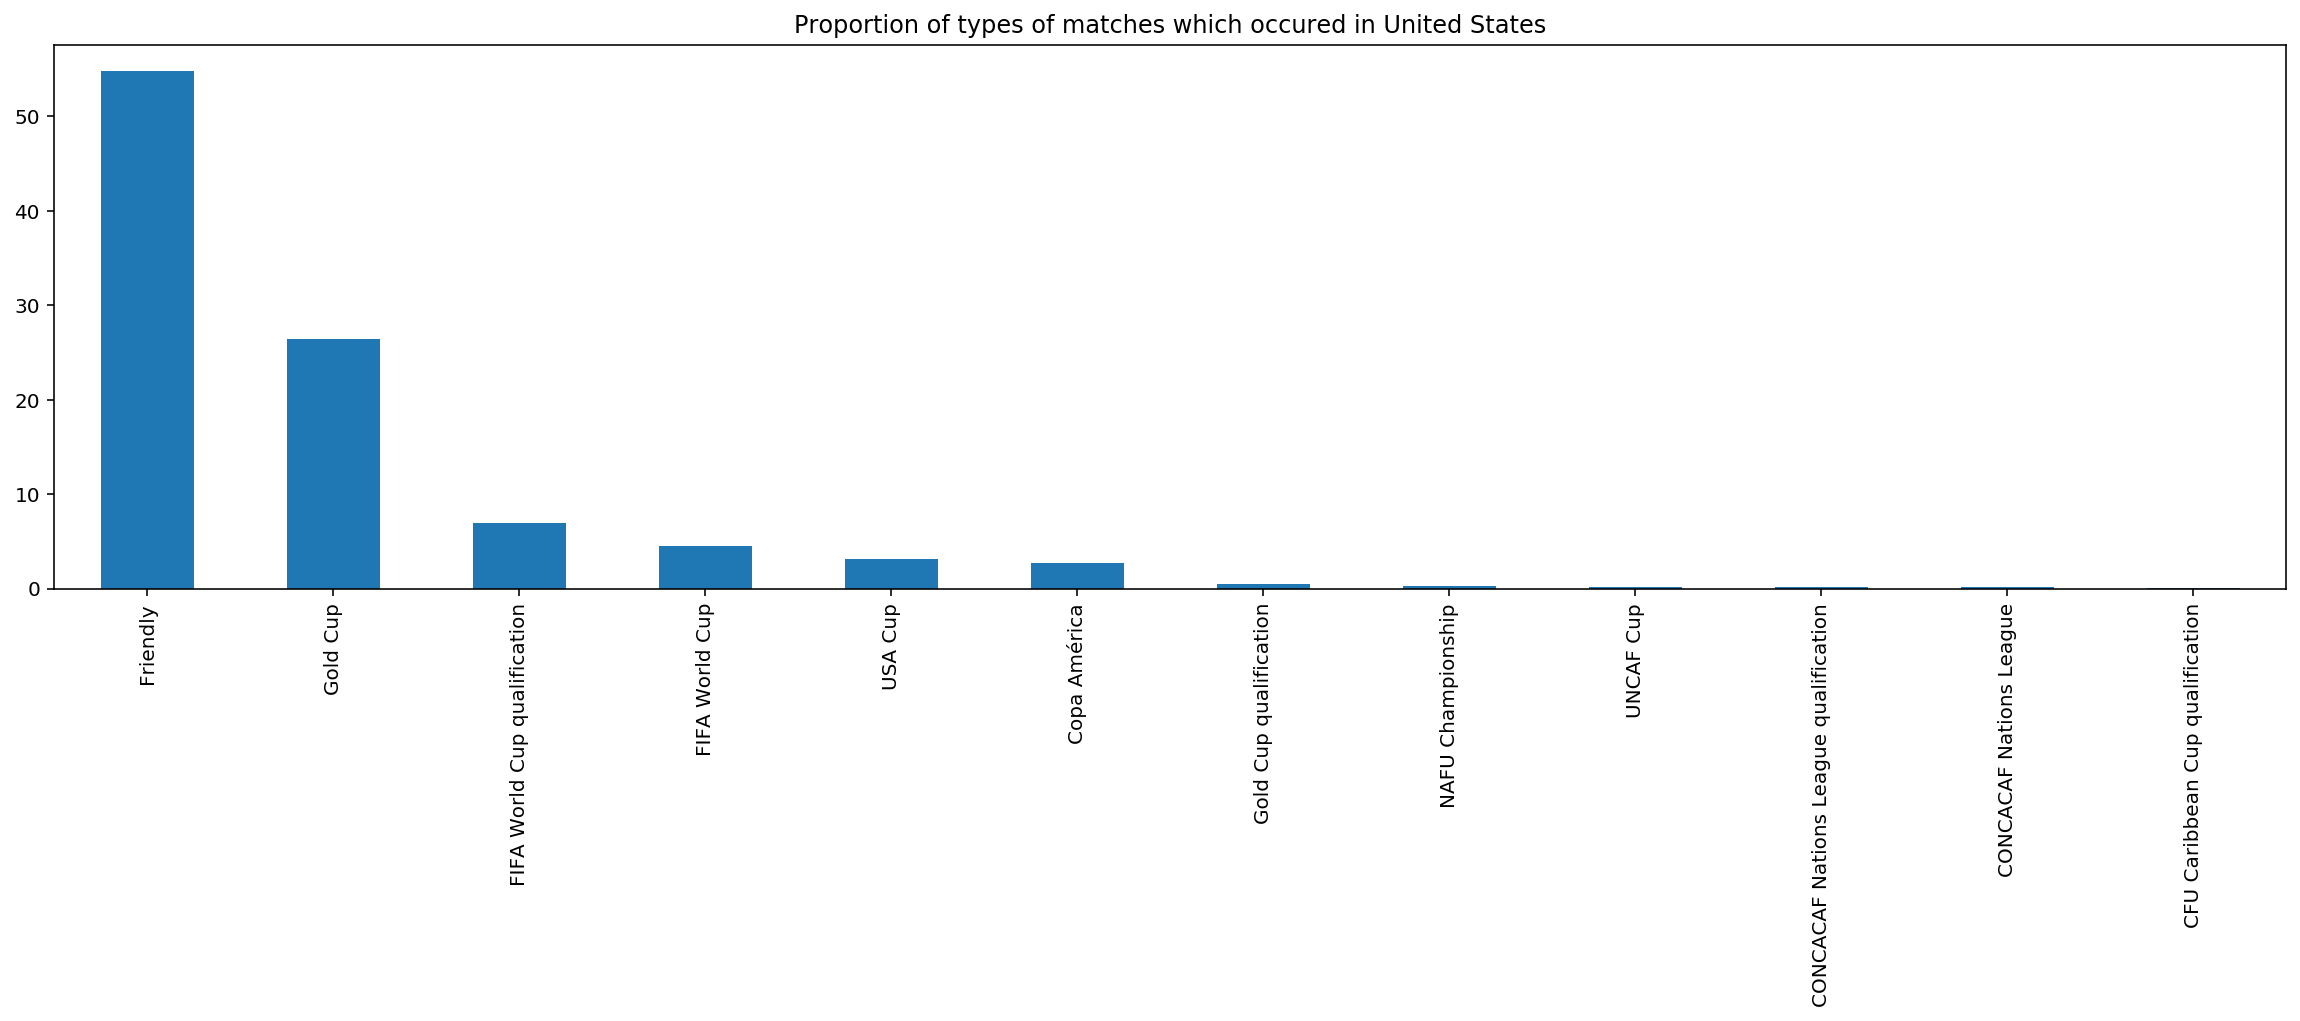

In [92]:
us_matches = data[data['country']=='United States']['tournament']
(us_matches.value_counts()/us_matches.count()*100).plot.bar(y=0, legend=False, figsize=(20, 5),
                                                                    title='Proportion of types of matches which occured in United States')
plt.show()

Indeed, the majority of matches played in the US are friendly matches. But also a lot of matches have been played during the Gold Cup (North American championship).

### Distribution of the matches per city (top and low 50)


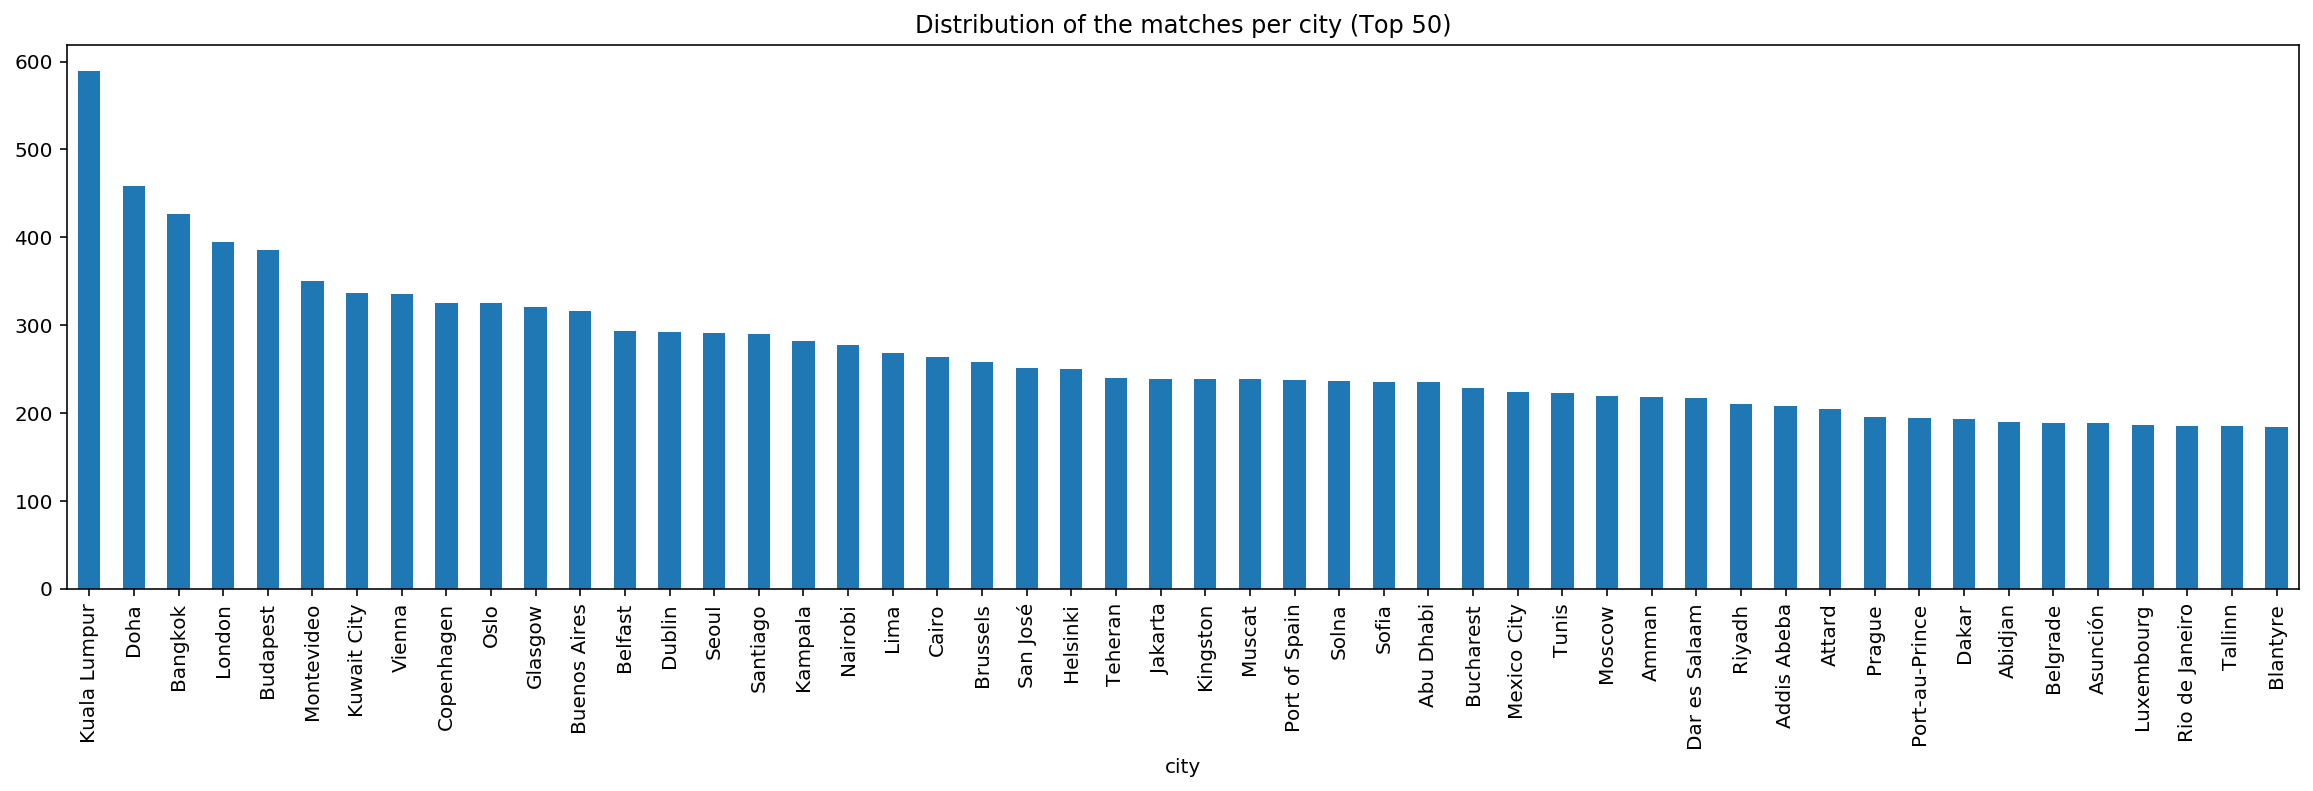

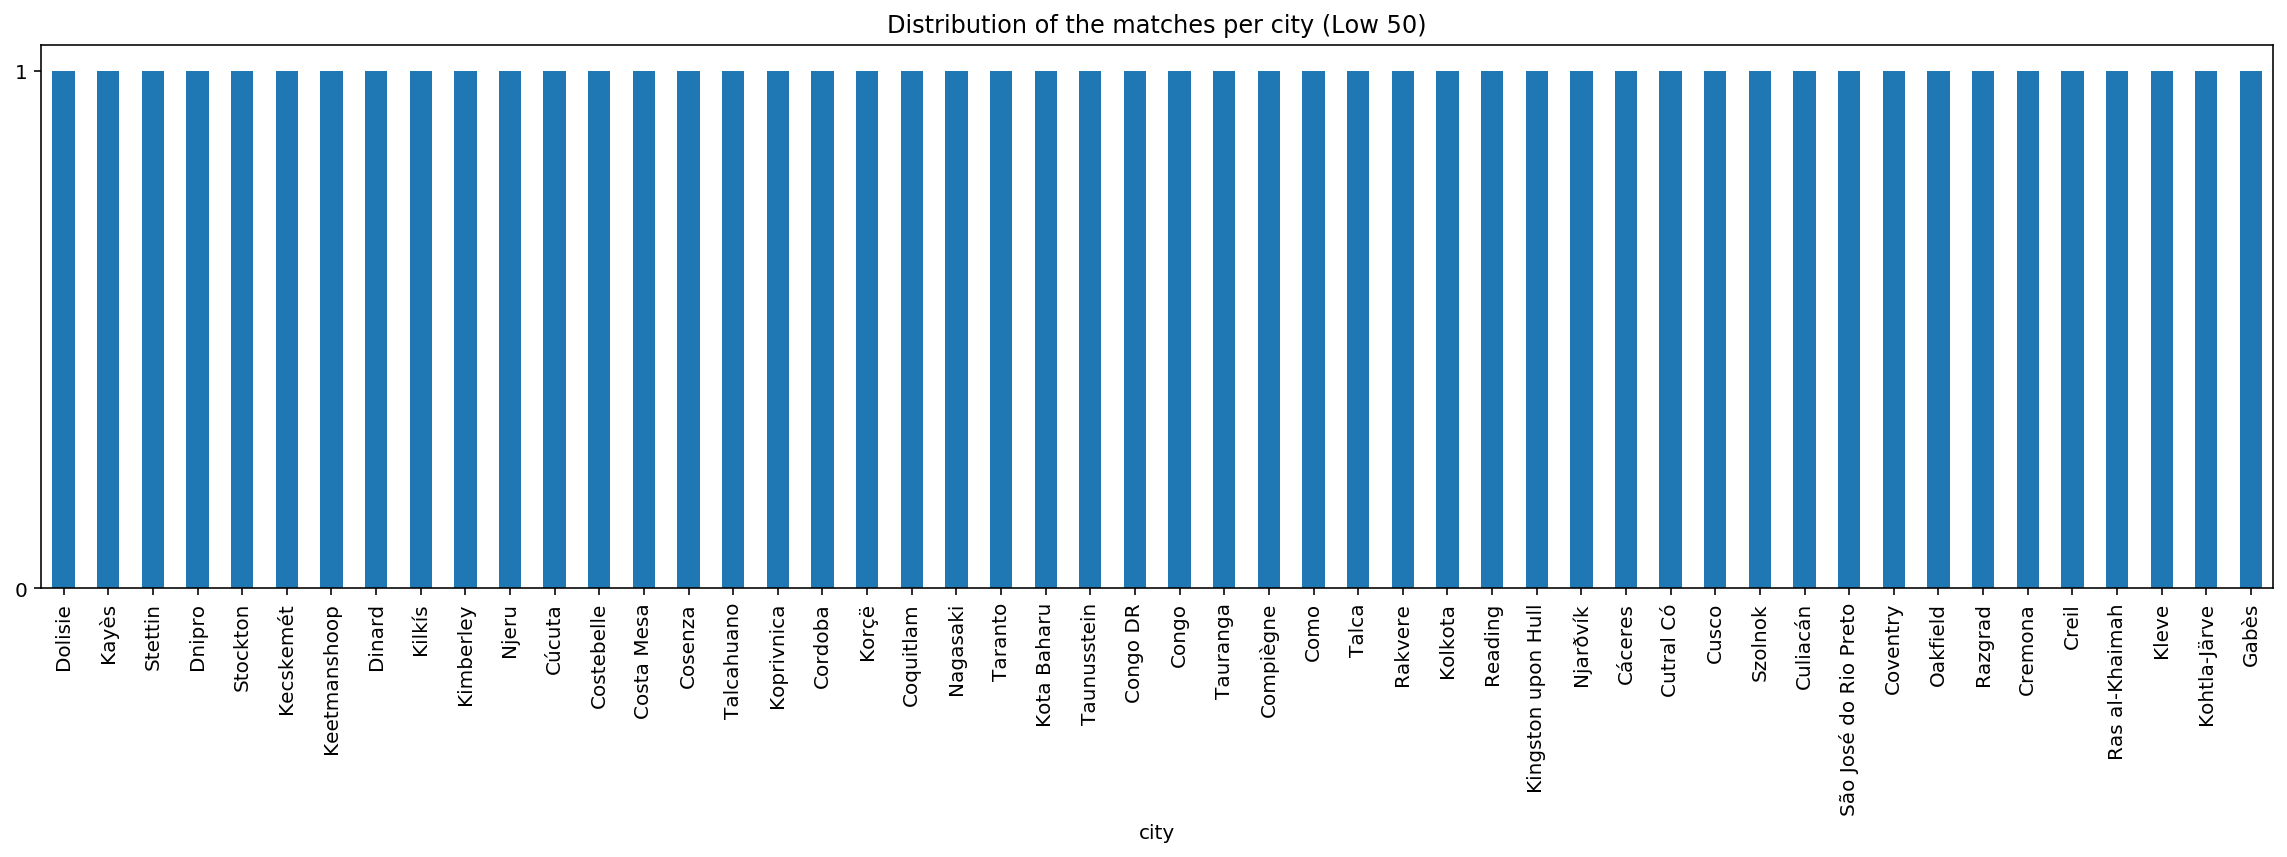

In [93]:
city_count=data['city'].groupby(data['city']).count().sort_values(0, ascending=False)
pd.DataFrame(city_count[:50]).plot.bar(y=0,legend=False, figsize=(20,5), title='Distribution of the matches per city (Top 50)')
pd.DataFrame(city_count[-50:]).plot.bar(y=0,legend=False, figsize=(20,5), title='Distribution of the matches per city (Low 50)')
plt.yticks([0,1])
plt.show()

Countries and cities seem to have distinct policies when it comes to hosting games.


___
## Neutral, away and home matches

### Repartition of neutral vs non-neutral fields


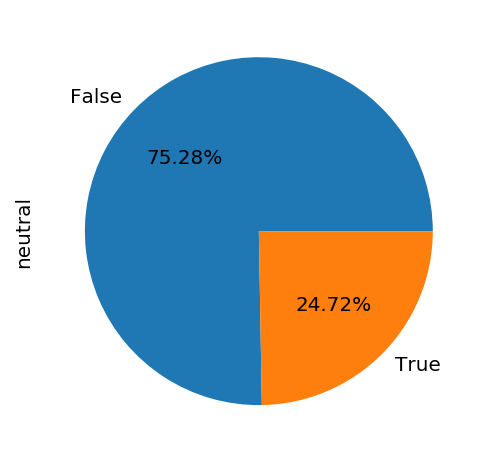

In [94]:
city_count=data['neutral'].groupby(data['neutral']).count()
pd.DataFrame(city_count[:10]).plot.pie(y=0,legend=False, autopct='%1.2f%%', startangle=0)
plt.show()

### Comparative stats on the scores for neutral vs non-neutral fields


In [95]:
neutral_matches=data[data['neutral']==True]
non_neutral_matches=data[data['neutral']==False]
neutral_diff=np.abs(neutral_matches['home_score']-neutral_matches['away_score'])
non_neutral_diff=np.abs(non_neutral_matches['home_score']-non_neutral_matches['away_score'])
non_neutral_advantage=non_neutral_matches['home_score']-non_neutral_matches['away_score']

print('For Neutral Fields:')
print('Mean difference in score -  -  :', round(np.mean(neutral_diff), 3))
print('Median difference in score  -  :',round(np.median(neutral_diff), 3))
print('Std of the difference in score :',round(np.std(neutral_diff), 3))

print('\nFor Non-Neutral Fields:')
print('Mean difference in score -  -  -  -  -  -  - :',round(np.mean(non_neutral_diff), 3))
print('Median difference in score  -  -  -  -  -  - :',round(np.median(non_neutral_diff), 3))
print('Std of the difference in score -  -  -  -  - :',round(np.std(non_neutral_diff), 3))
print('Mean advantage in score for home teams  -  - :',round(np.mean(non_neutral_advantage), 3))
print('Median advantage in score for home teams   - :',round(np.median(non_neutral_advantage), 3))
print('Std of the advantage in score for home teams :',round(np.std(non_neutral_advantage), 3))

For Neutral Fields:
Mean difference in score -  -  : 1.777
Median difference in score  -  : 1.0
Std of the difference in score : 2.025

For Non-Neutral Fields:
Mean difference in score -  -  -  -  -  -  - : 1.671
Median difference in score  -  -  -  -  -  - : 1.0
Std of the difference in score -  -  -  -  - : 1.685
Mean advantage in score for home teams  -  - : 0.659
Median advantage in score for home teams   - : 1.0
Std of the advantage in score for home teams : 2.279


### Repartition of home vs away team victories for non-neutral fields


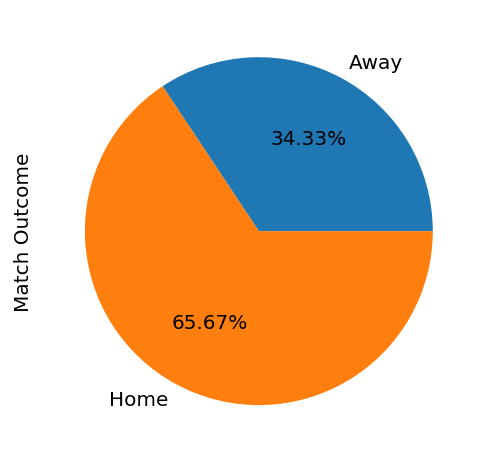

In [96]:
non_neutral_victories=non_neutral_advantage[non_neutral_advantage!=0]
non_neutral_victories[non_neutral_advantage>0]='Home'
non_neutral_victories[non_neutral_advantage<0]='Away'
non_neutral_victories=non_neutral_victories.groupby(non_neutral_victories).count()
pd.DataFrame(non_neutral_victories).rename(columns={0:'Match Outcome'}).plot.pie(y=0, legend=False, autopct='%1.2f%%', startangle=0)
plt.show()

### Comparative stats on the scores for away vs home teams

In [97]:
print('For Home Teams:')
print('Mean score       :', round(np.mean(non_neutral_matches['home_score']), 3))
print('Median score     :', round(np.median(non_neutral_matches['home_score']), 3))
print('Std of the score :', round(np.std(non_neutral_matches['home_score']), 3))

print('\nFor Away Teams:')
print('Mean score       :', round(np.mean(non_neutral_matches['away_score']), 3))
print('Median score     :', round(np.median(non_neutral_matches['away_score']), 3))
print('Std of the score :', round(np.std(non_neutral_matches['away_score']), 3))

For Home Teams:
Mean score       : 1.778
Median score     : 1.0
Std of the score : 1.726

For Away Teams:
Mean score       : 1.119
Median score     : 1.0
Std of the score : 1.291


- Most matches take place on a neutral field.
- Matches on non-neutral fields are mostly won by the home team.
- The average score of for home teams is considerably higher than the one of away teams.
- Matches on a neutral field have more varied results and higher mean score difference.

### Repartition of goals between home and away team depending on the type of match

In [98]:
home_score_list = list(data.groupby(data['tournament']).home_score.sum())
away_score_list = list(data.groupby(data['tournament']).away_score.sum())

In [99]:
t1={'x':tournament_list,'y':home_score_list,'name':'Home Score','type':'bar', 'marker':dict(color = 'orange')};
t2={'x':tournament_list,'y':away_score_list,'name':'Away Score','type':'bar', 'marker':dict(color = 'rgb(58, 119, 155)')};
data1=[t1,t2]
layout = {'xaxis': {'title': 'Tournaments'},
          'barmode': 'relative',
          'title': 'Repartition of goals between home and away team depending on the type of match'};
fig = go.Figure(data = data1, layout = layout)
iplot(fig)

# Dataset Limitations

The dataset at hand is preaty straight-forward, seems to have no missing data nor corrupted information. That being said, a couple limitations can still be observed:

In [100]:
data[data['home_team']=='Yugoslavia'].head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
637,1922-06-08,Yugoslavia,Romania,1,2,Friendly,Belgrade,Yugoslavia,False
644,1922-06-28,Yugoslavia,Czechoslovakia,4,3,Friendly,Zagreb,Yugoslavia,False
664,1922-10-01,Yugoslavia,Poland,1,3,Friendly,Zagreb,Yugoslavia,False
776,1924-02-10,Yugoslavia,Austria,1,4,Friendly,Zagreb,Yugoslavia,False
836,1924-09-28,Yugoslavia,Czechoslovakia,0,2,Friendly,Zagreb,Yugoslavia,False


Some countries that do not exist anymore because they split into multiple smaller countries or fused to make a bigger one can be observed and will need to be taken care of.

In [101]:
data[data['home_team']=='Provence'].head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
30447,2008-07-08,Provence,Padania,1,6,Viva World Cup,Gällivare,Sweden,True
30448,2008-07-09,Provence,Iraqi Kurdistan,0,3,Viva World Cup,Malmberget,Sweden,True
31359,2009-06-22,Provence,Gozo,3,1,Viva World Cup,Novara,Italy,True
31368,2009-06-25,Provence,Iraqi Kurdistan,0,6,Viva World Cup,Varese,Italy,True
31371,2009-06-26,Provence,Sápmi,4,4,Viva World Cup,Brescia,Italy,True


Teams from cities and regions can also be observed, so the international matches featured in the dataset do not strickly include national teams rather any team that participated to an international match at some point. This nuance will need to be taken into account.